In [2]:
import pandas as pd
import pickle
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\Tippu\Downloads\UCI_Credit_Card.csv\UCI_Credit_Card.csv")

In [7]:
#seperating input and output  data variables

X=data.drop(['default.payment.next.month'],axis=1)
y=data['default.payment.next.month']

x_numericdata=X.iloc[:,5:]
#numeric input variable

x_numericdata1=pd.concat([x_numericdata,X[['LIMIT_BAL']]],axis=1)
x_numericdata1

AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  \
0       24      2      2     -1     -1     -2     -2     3913.0     3102.0   
1       26     -1      2      0      0      0      2     2682.0     1725.0   
2       34      0      0      0      0      0      0    29239.0    14027.0   
3       37      0      0      0      0      0      0    46990.0    48233.0   
4       57     -1      0     -1      0      0      0     8617.0     5670.0   
...    ...    ...    ...    ...    ...    ...    ...        ...        ...   
29995   39      0      0      0      0      0      0   188948.0   192815.0   
29996   43     -1     -1     -1     -1      0      0     1683.0     1828.0   
29997   37      4      3      2     -1      0      0     3565.0     3356.0   
29998   41      1     -1      0      0      0     -1    -1645.0    78379.0   
29999   46      0      0      0      0      0      0    47929.0    48905.0   

       BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0          689.0        0.0        0.0        0.0       0.0     689.0   
1         2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2        13559.0    14331.0    14948.0    15549.0    1518.0    1500.0   
3        49291.0    28314.0    28959.0    29547.0    2000.0    2019.0   
4        35835.0    20940.0    19146.0    19131.0    2000.0   36681.0   
...          ...        ...        ...        ...       ...       ...   
29995   208365.0    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     3502.0     8979.0     5190.0        0.0    1837.0    3526.0   
29997     2758.0    20878.0    20582.0    19357.0       0.0       0.0   
29998    76304.0    52774.0    11855.0    48944.0   85900.0    3409.0   
29999    49764.0    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  LIMIT_BAL  
0           0.0       0.0       0.0       0.0    20000.0  
1        1000.0    1000.0       0.0    2000.0   120000.0  
2        1000.0    1000.0    1000.0    5000.0    90000.0  
3        1200.0    1100.0    1069.0    1000.0    50000.0  
4       10000.0    9000.0     689.0     679.0    50000.0  
...         ...       ...       ...       ...        ...  
29995    5003.0    3047.0    5000.0    1000.0   220000.0  
29996    8998.0     129.0       0.0       0.0   150000.0  
29997   22000.0    4200.0    2000.0    3100.0    30000.0  
29998    1178.0    1926.0   52964.0    1804.0    80000.0  
29999    1430.0    1000.0    1000.0    1000.0    50000.0  

[30000 rows x 20 columns]

In [13]:
x_numericdata1.describe()

#the bill amount generated represents the total amount that the cardholder is required to pay to settle their credit card account for a specific billing cycle
#which  includes various transactions and charges incurred by the cardholder during that billing period.
#the total outstanding balance on the credit card account. cardholders are  required to make at least the minimum payment by the due date specified on the bill. 
#The minimum payment is a percentage of the total balance, and paying only the minimum may result in interest charges on the remaining balance.

AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6       LIMIT_BAL  
count   30000.000000    30000.000000  
mean     5215.502567   167484.322667  
std     17777.465775   129747.661567  
min         0.000000    10000.000000  
25%       117.750000    50000.000000  
50%      1500.000000   140000.000000  
75%      4000.000000   240000.000000  
max    528666.000000  1000000.000000

In [14]:

import pandas as pd
import numpy as np

# Calculate skewness and kurtosis
for col in (x_numericdata1.iloc[:,1:7]).columns:
    skewness = x_numericdata1[col].skew()
    kurtosis = x_numericdata1[col].kurt()
    print(f'for the repayement status of month {col[4]},"Skewness:", {skewness}, "\tKurtosis:", {kurtosis}')


# As Skewness > 0 and it implies that is  slightly Right-skewed.

# As Kurtosis > 0: Leptokurtic as the distribution has fatter tails and a sharper peak than a normal distribution.

for the repayement status of month 0,"Skewness:", 0.7319749269085081, "	Kurtosis:", 2.7207150417164834
for the repayement status of month 2,"Skewness:", 0.7905650222025086, "	Kurtosis:", 1.5704177295124482
for the repayement status of month 3,"Skewness:", 0.8406818269466301, "	Kurtosis:", 2.0844358750689342
for the repayement status of month 4,"Skewness:", 0.9996294133044786, "	Kurtosis:", 3.49698349574992
for the repayement status of month 5,"Skewness:", 1.0081970251062178, "	Kurtosis:", 3.9897481437030193
for the repayement status of month 6,"Skewness:", 0.948029391555358, "	Kurtosis:", 3.426534130386934


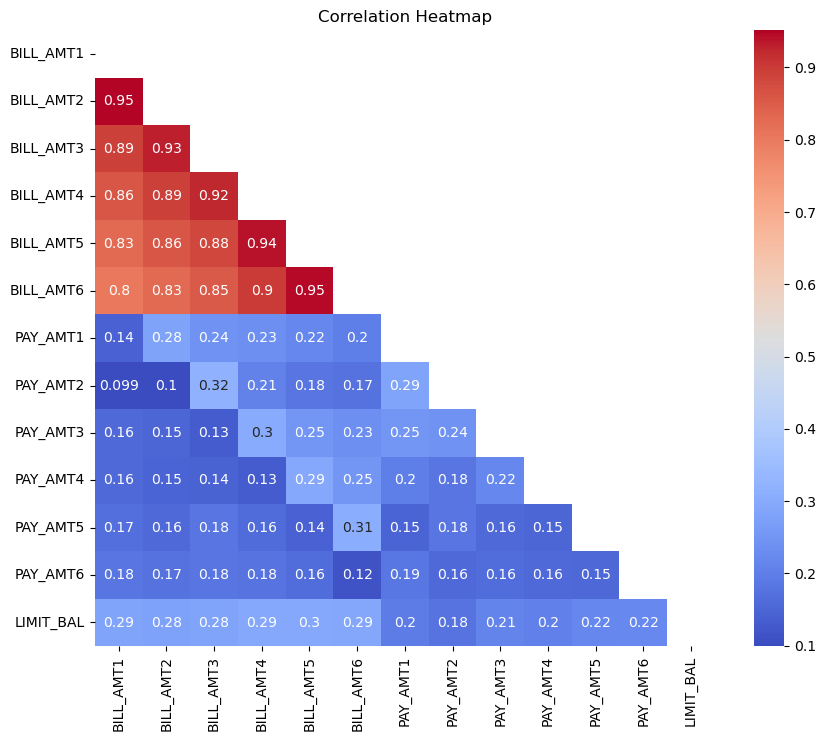

In [31]:
#correlation between the variables
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_numericdata1 is your DataFrame
corr_matrix = x_numericdata1.iloc[:, 7:].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with the masked upper triangle
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)

plt.title('Correlation Heatmap')
plt.show()



#in the bill_amt1 have  significant correlation observed and also there is some temporal dependencies i.e,having correlations  over all the past time ( for all previous months) for each observations.



<Axes: >

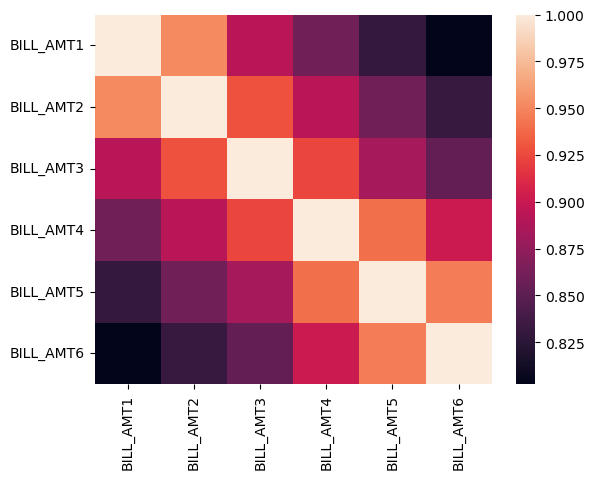

In [8]:
#bill amounts generated/stmts from april-sept(6months)
import seaborn as sns
sns.heatmap(x_numericdata1.loc[:,'BILL_AMT1':'BILL_AMT6'].corr())
# the bill generation is strongly correlated within  all the previous months


<Axes: >

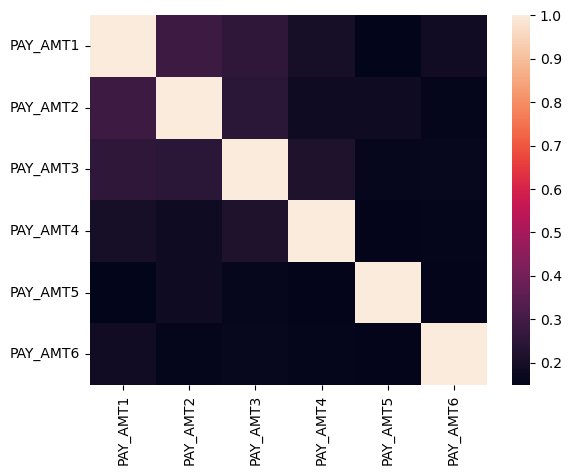

In [9]:
x_numericdata1.loc[:,'PAY_AMT1':'PAY_AMT6'].corr()
sns.heatmap(x_numericdata1.loc[:,'PAY_AMT1':'PAY_AMT6'].corr())
#Amount of previous payment in months with there past months are not correlated much

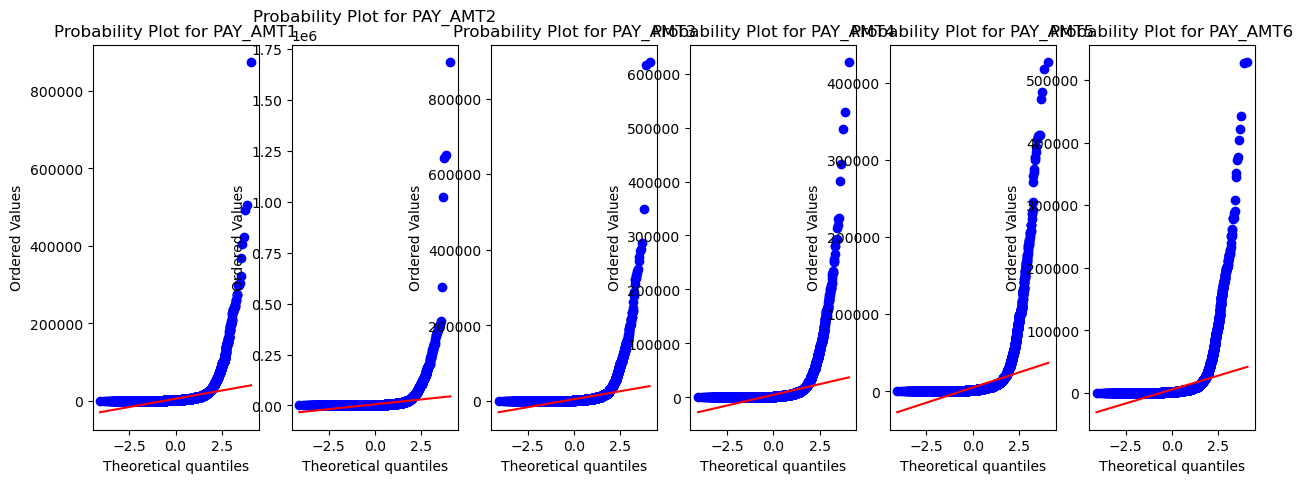

In [10]:
# Q-Q plot for payment stmt

from scipy import stats
import pylab

#repayeent amt qq plot
pyt=x_numericdata1.loc[:,'PAY_AMT1':'PAY_AMT6']
fig, axes = plt.subplots(nrows=1, ncols=len(pyt.columns), figsize=(15, 5))
for i,col in enumerate(pyt.columns):
    ax=axes[i]
    stats.probplot(pyt[col],dist='norm',plot=ax)
    ax.set_title(f'Probability Plot for {col}')

plt.show()


# It clearly deviates from the normal  distribution 
#If the points on the Q-Q plot roughly align with the diagonal line, it suggests that the data follows a normal distribution.
#  Departures from the line indicate non-normality.

#NORMALITY TEST

from scipy.stats import normaltest
import pandas as pd
  # Perform normality test
for col in (x_numericdata1.loc[:,'PAY_AMT1':'PAY_AMT6']).columns:
    statistic, p_value = normaltest(x_numericdata1[col])
    # Print the results
    print(f'The "Normality Test for {col}:"')
    print("Statistic:", statistic, "P-value:", p_value)
    
#AS the p-value is small (usually less than 0.05) and the statistic value is large, you may conclude that the data significantly 
#deviates from a normal distribution, and you reject the null hypothesis(indicating evidence against normality.).

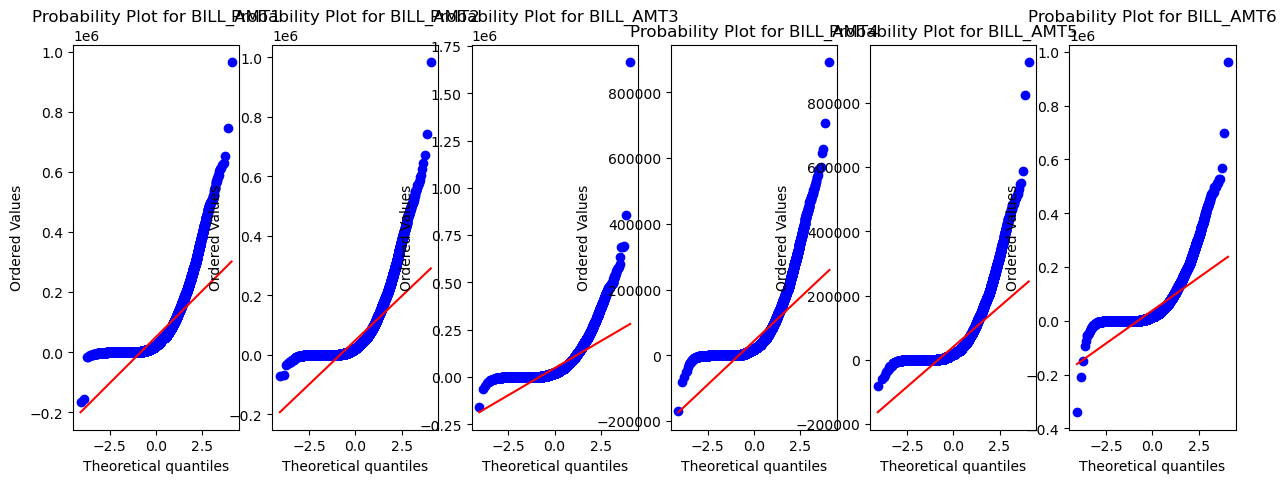

In [17]:
#bill amount qq plot

bla=x_numericdata1.loc[:,'BILL_AMT1':'BILL_AMT6']
fig, axes = plt.subplots(nrows=1, ncols=len(bla.columns), figsize=(15, 5))

for i,col in enumerate(bla.columns):
    ax=axes[i]
    stats.probplot(bla[col],dist='norm',plot=ax)
    ax.set_title(f'Probability Plot for {col}')
    
#NORMALITY TEST 
for col in x_numericdata1.loc[:,'BILL_AMT1':'BILL_AMT6'].columns:
    statistic, p_value = normaltest(x_numericdata1[col])
    # Print the results
    print(f'The "Normality Test for {col}:"')
    print("Statistic:", statistic, "P-value:", p_value)

#The distribution is statistically significant as p<0 and statistic value is large.

In [23]:
c1=['AGE','LIMIT_BAL']
for i,col in enumerate(c1):
    ax=axes[i]
    stats.probplot( x_numericdata1[col],dist='norm',plot=ax)
    ax.set_title(f'Probability Plot for {col}')
    
#NORMALITY TEST 
for col in c1:
    statistic, p_value = normaltest(x_numericdata1[col])
    # Print the results
    print(f'The "Normality Test for {col}:"')
    print("Statistic:", statistic, "P-value:", p_value)
    
    
#AS the p-value is small (usually less than 0.05) and the statistic value is large, you may conclude that the data significantly 
#deviates from a normal distribution, and you reject the null hypothesis(indicating evidence against normality.).

The "Normality Test for AGE:"
Statistic: 2171.7037324610715 P-value: 0.0
The "Normality Test for LIMIT_BAL:"
Statistic: 3740.095049833546 P-value: 0.0


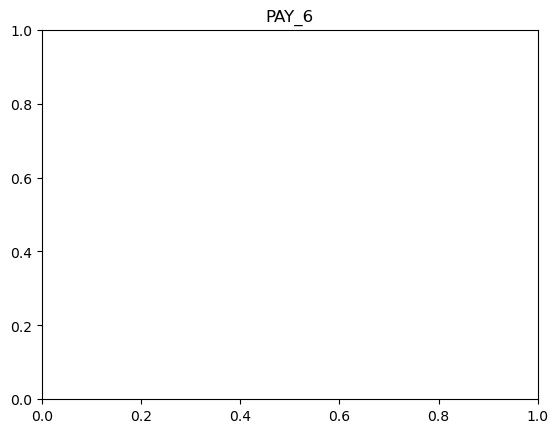

In [24]:
# histogram on the discrete values of  pay scales columns
for col in x_numericdata1.iloc[:,1:7].columns:
    fig=px.histogram(x_numericdata1[col])
    plt.title(f'{col}')
    fig.show()

#slightly left skewed distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


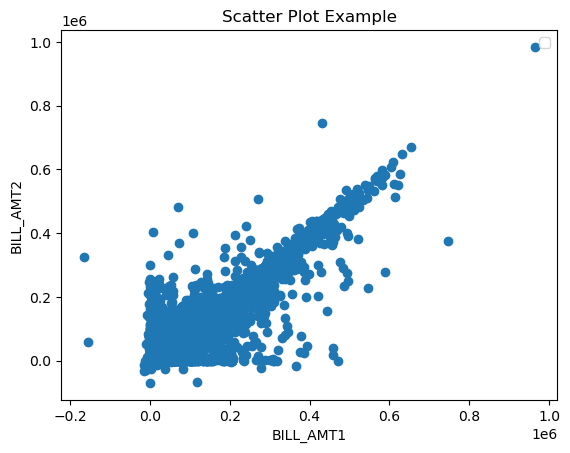

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


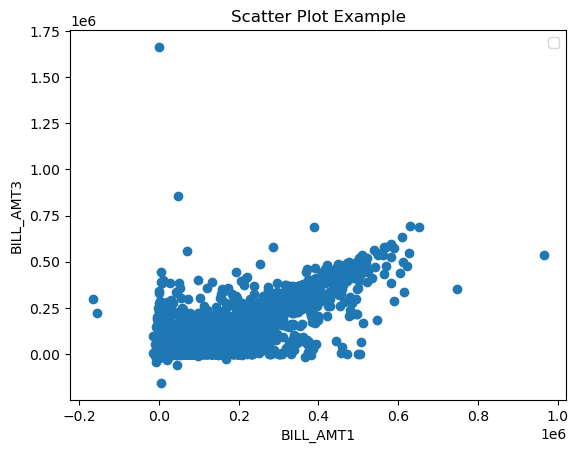

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


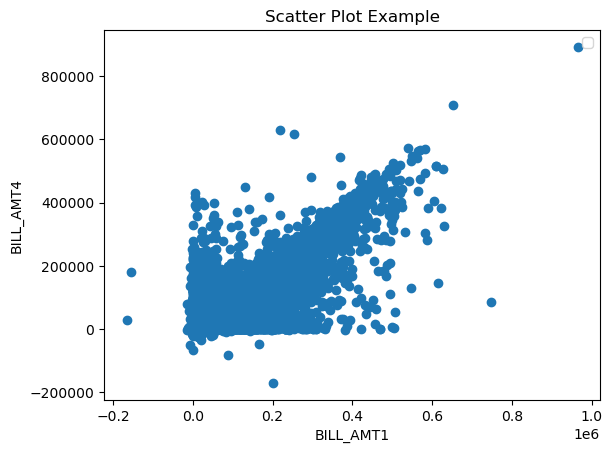

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


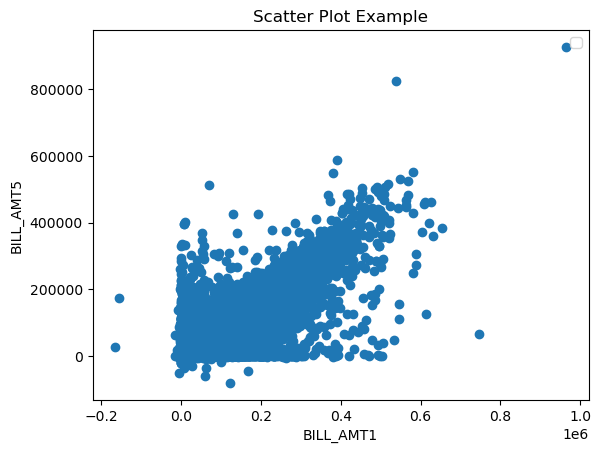

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


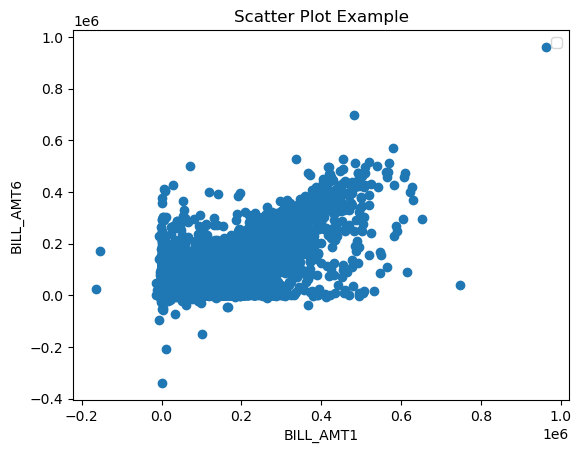

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


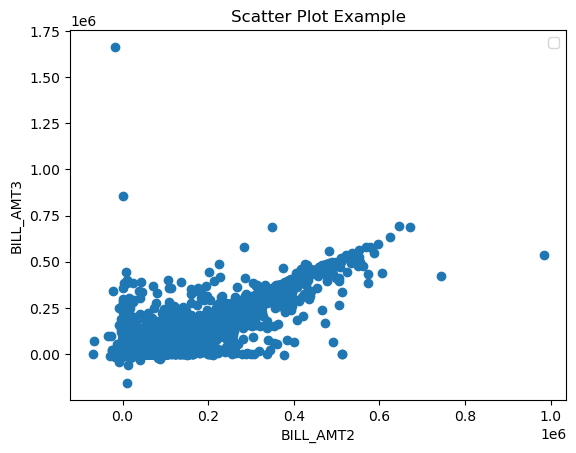

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


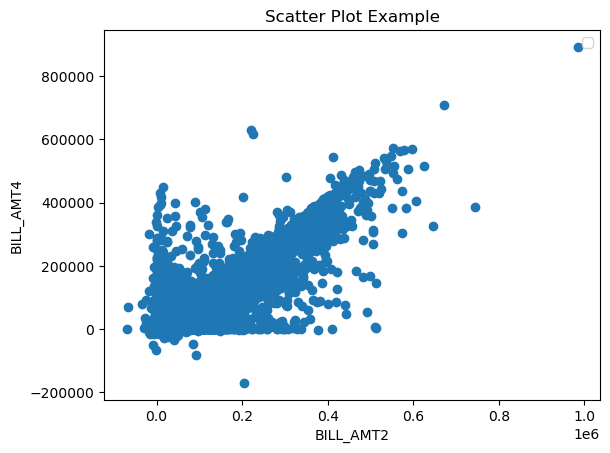

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


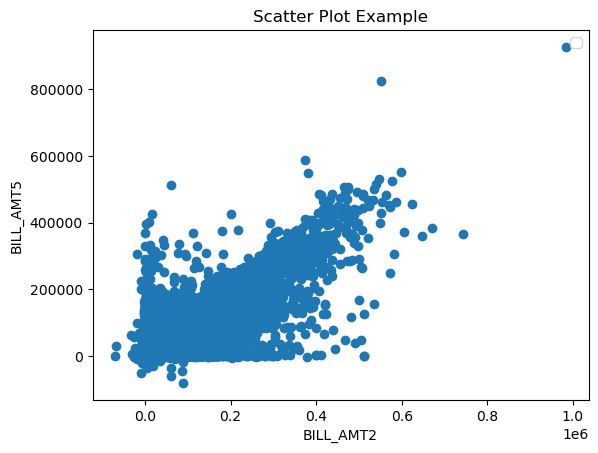

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


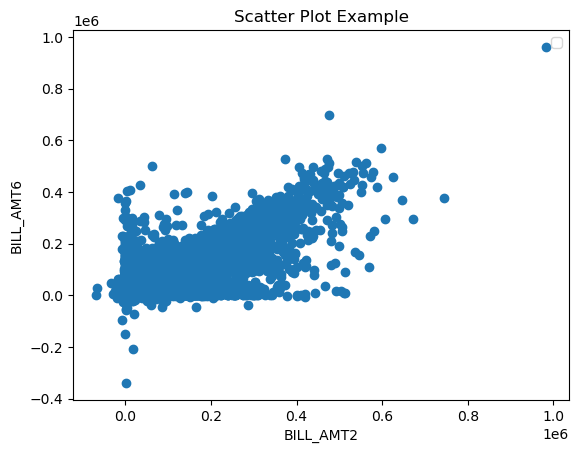

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


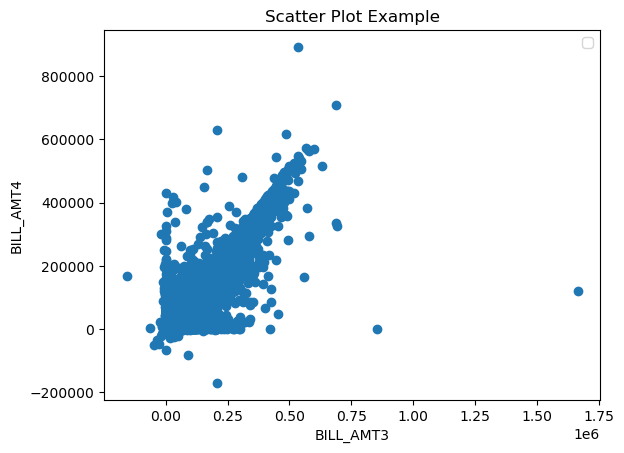

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


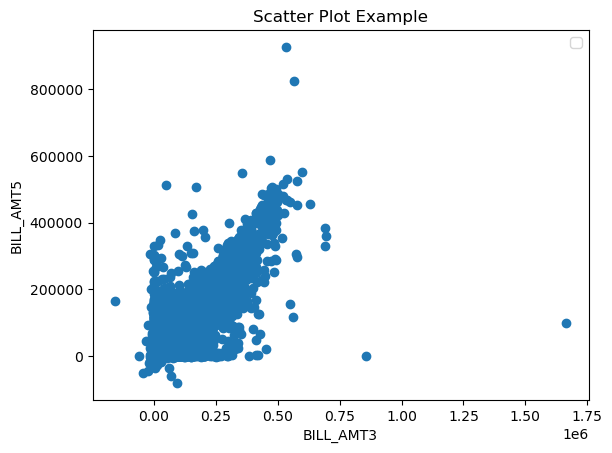

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


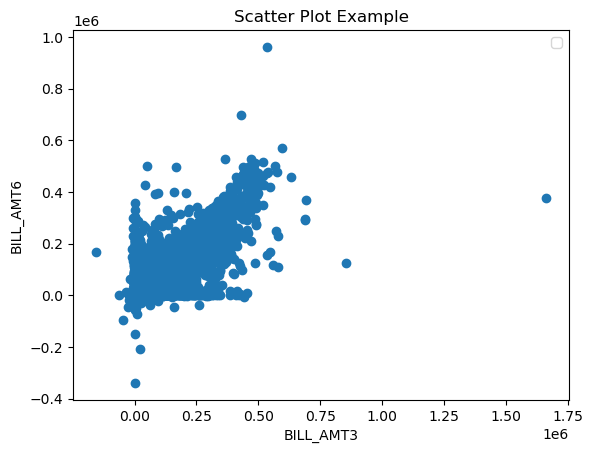

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


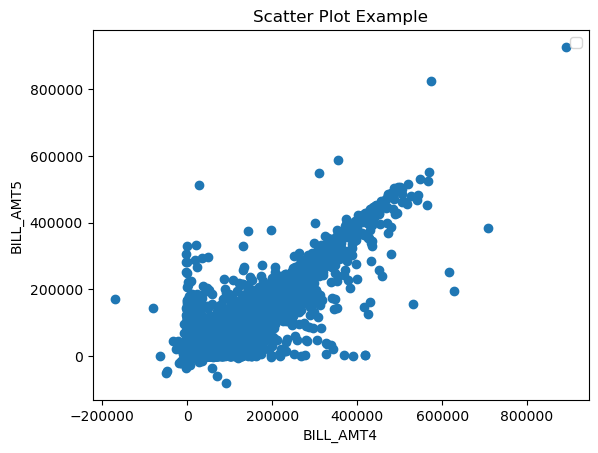

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


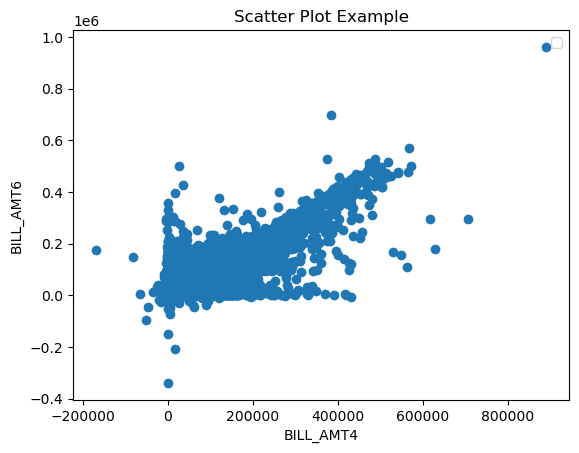

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


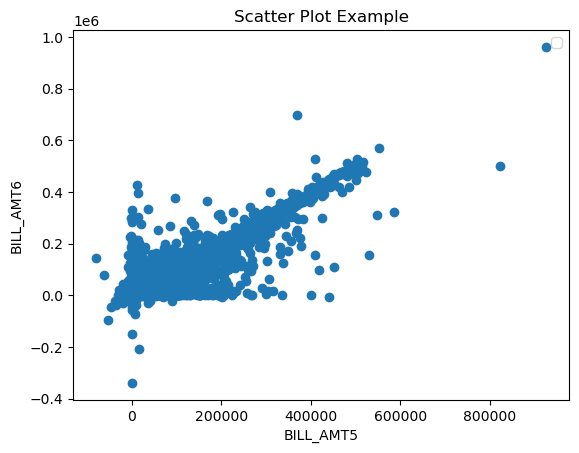

In [26]:
bla= x_numericdata1.loc[:,'BILL_AMT1':'BILL_AMT6']
columns=bla.columns
columns

# Loop through each combination of variables and create scatter plots
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        
        plt.scatter(bla[columns[i]],bla[columns[j]])

        # Adding labels and title
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.title('Scatter Plot Example')

        # Displaying legend
        plt.legend()

        # Showing the plot
        plt.show()
# there is a linear relationship among the billamount variables with each other 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


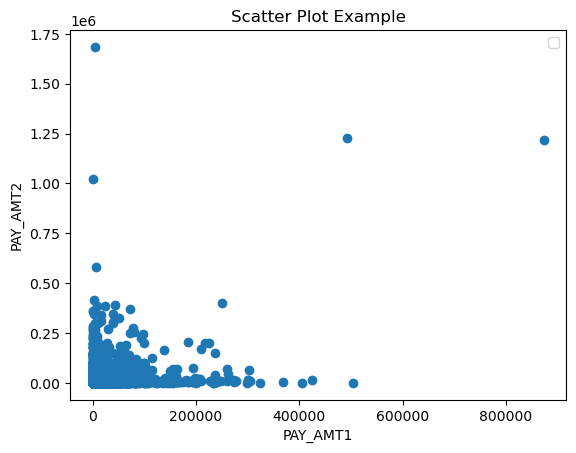

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


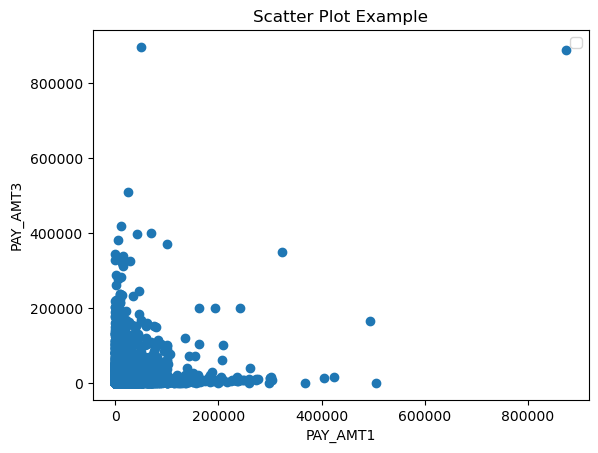

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


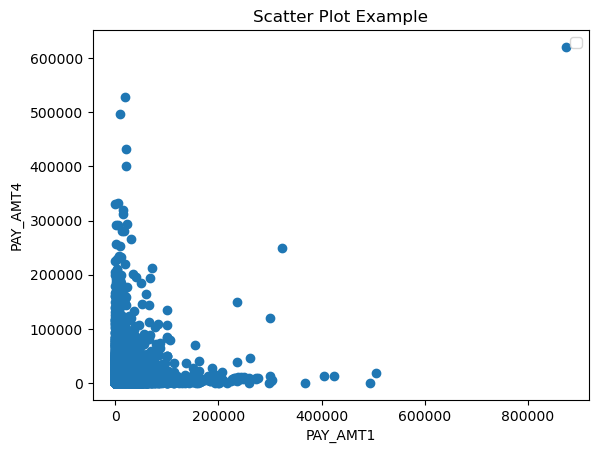

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


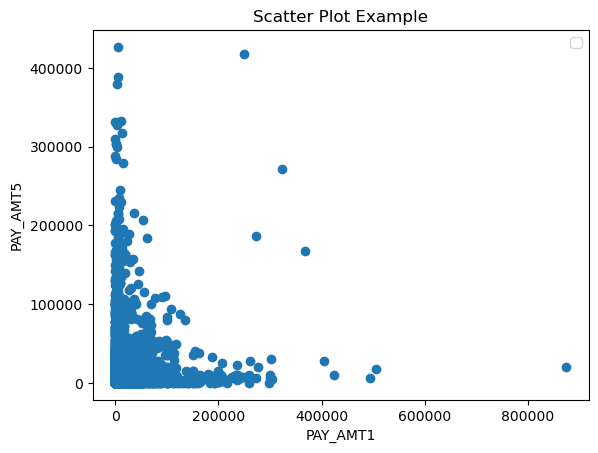

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


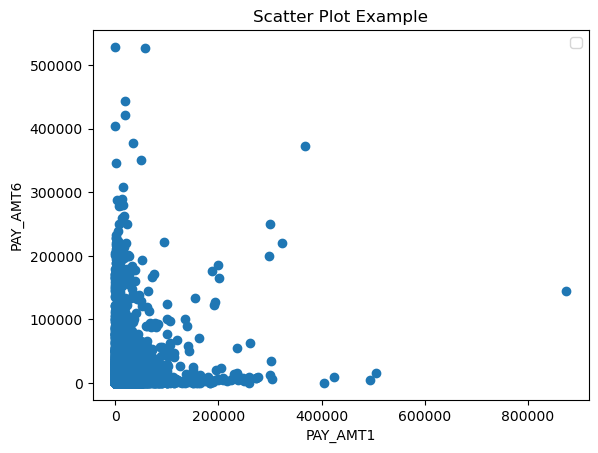

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


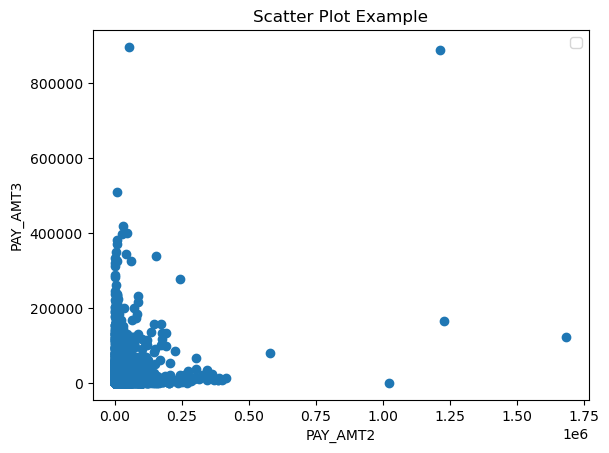

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


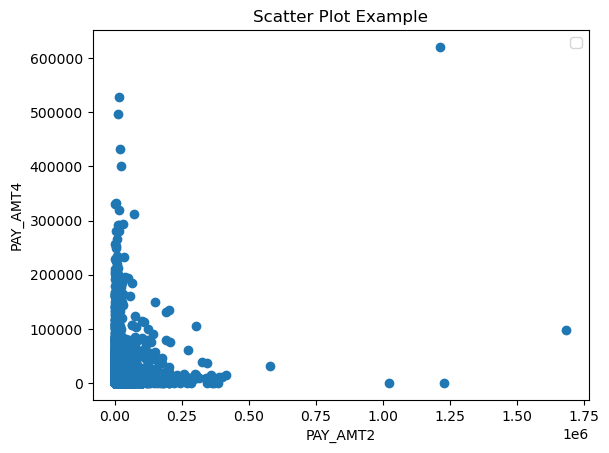

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


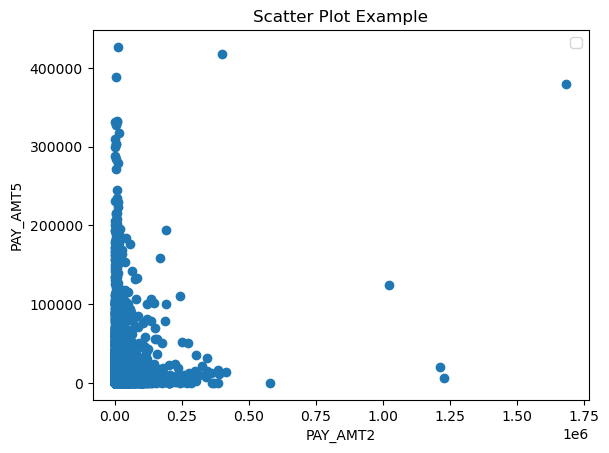

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


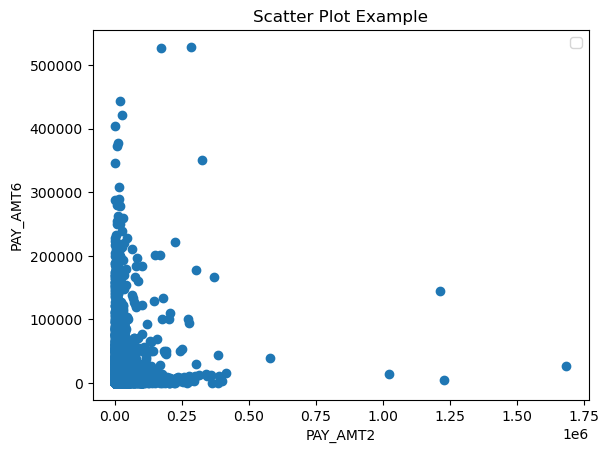

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


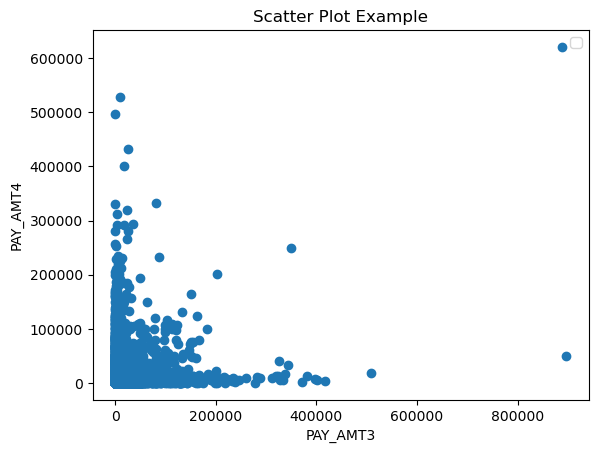

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


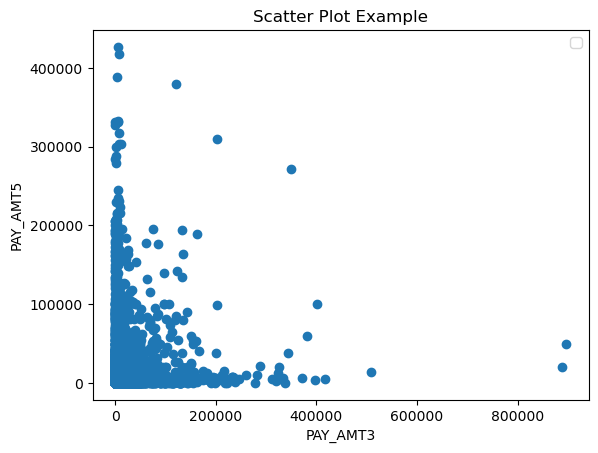

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


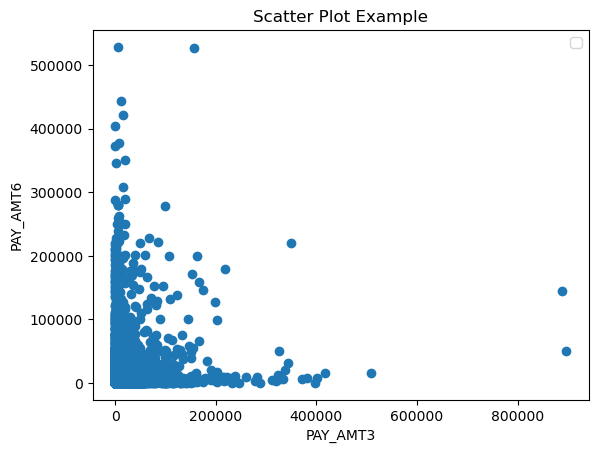

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


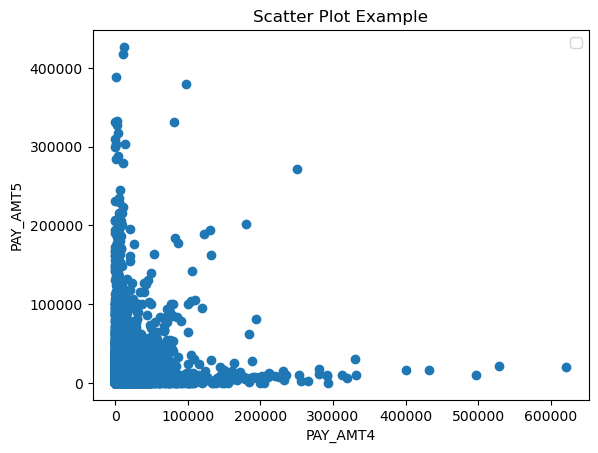

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


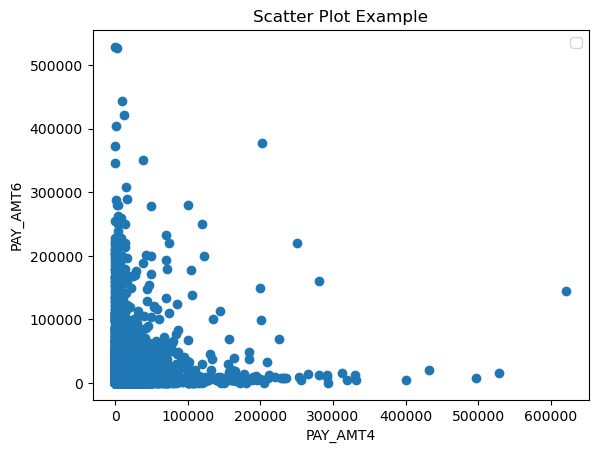

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


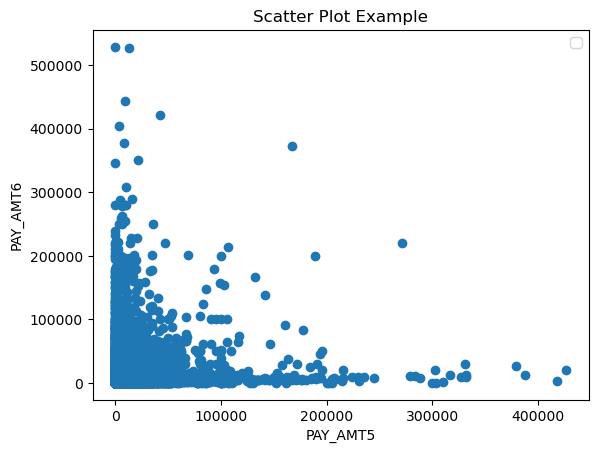

In [27]:

pyt=x_numericdata1.loc[:,'PAY_AMT1':'PAY_AMT6']

columns1=pyt.columns

# Loop through each combination of variables and create scatter plots
for i in range(len(columns1)):
    for j in range(i + 1, len(columns1)):
        
        plt.scatter(pyt[columns1[i]],pyt[columns1[j]])

        # Adding labels and title
        plt.xlabel(columns1[i])
        plt.ylabel(columns1[j])
        plt.title('Scatter Plot Example')

        # Displaying legend
        plt.legend()

        # Showing the plot
        plt.show()


In [28]:

# scatter plot on age and limit balance 
fig = px.scatter(x_numericdata1, x='AGE', y='LIMIT_BAL', title='Scatter Plot: Age vs Limit Balance')

# Set x-axis label
fig.update_xaxes(title_text='Age')

# Set y-axis label
fig.update_yaxes(title_text='Limit Balance')

# Display the plot
fig.show()



# there is a   overlapping data points or duplicate values in the plotted region.
 #there are repeated observations in your dataset, and these observations have identical values for both the x and y variables

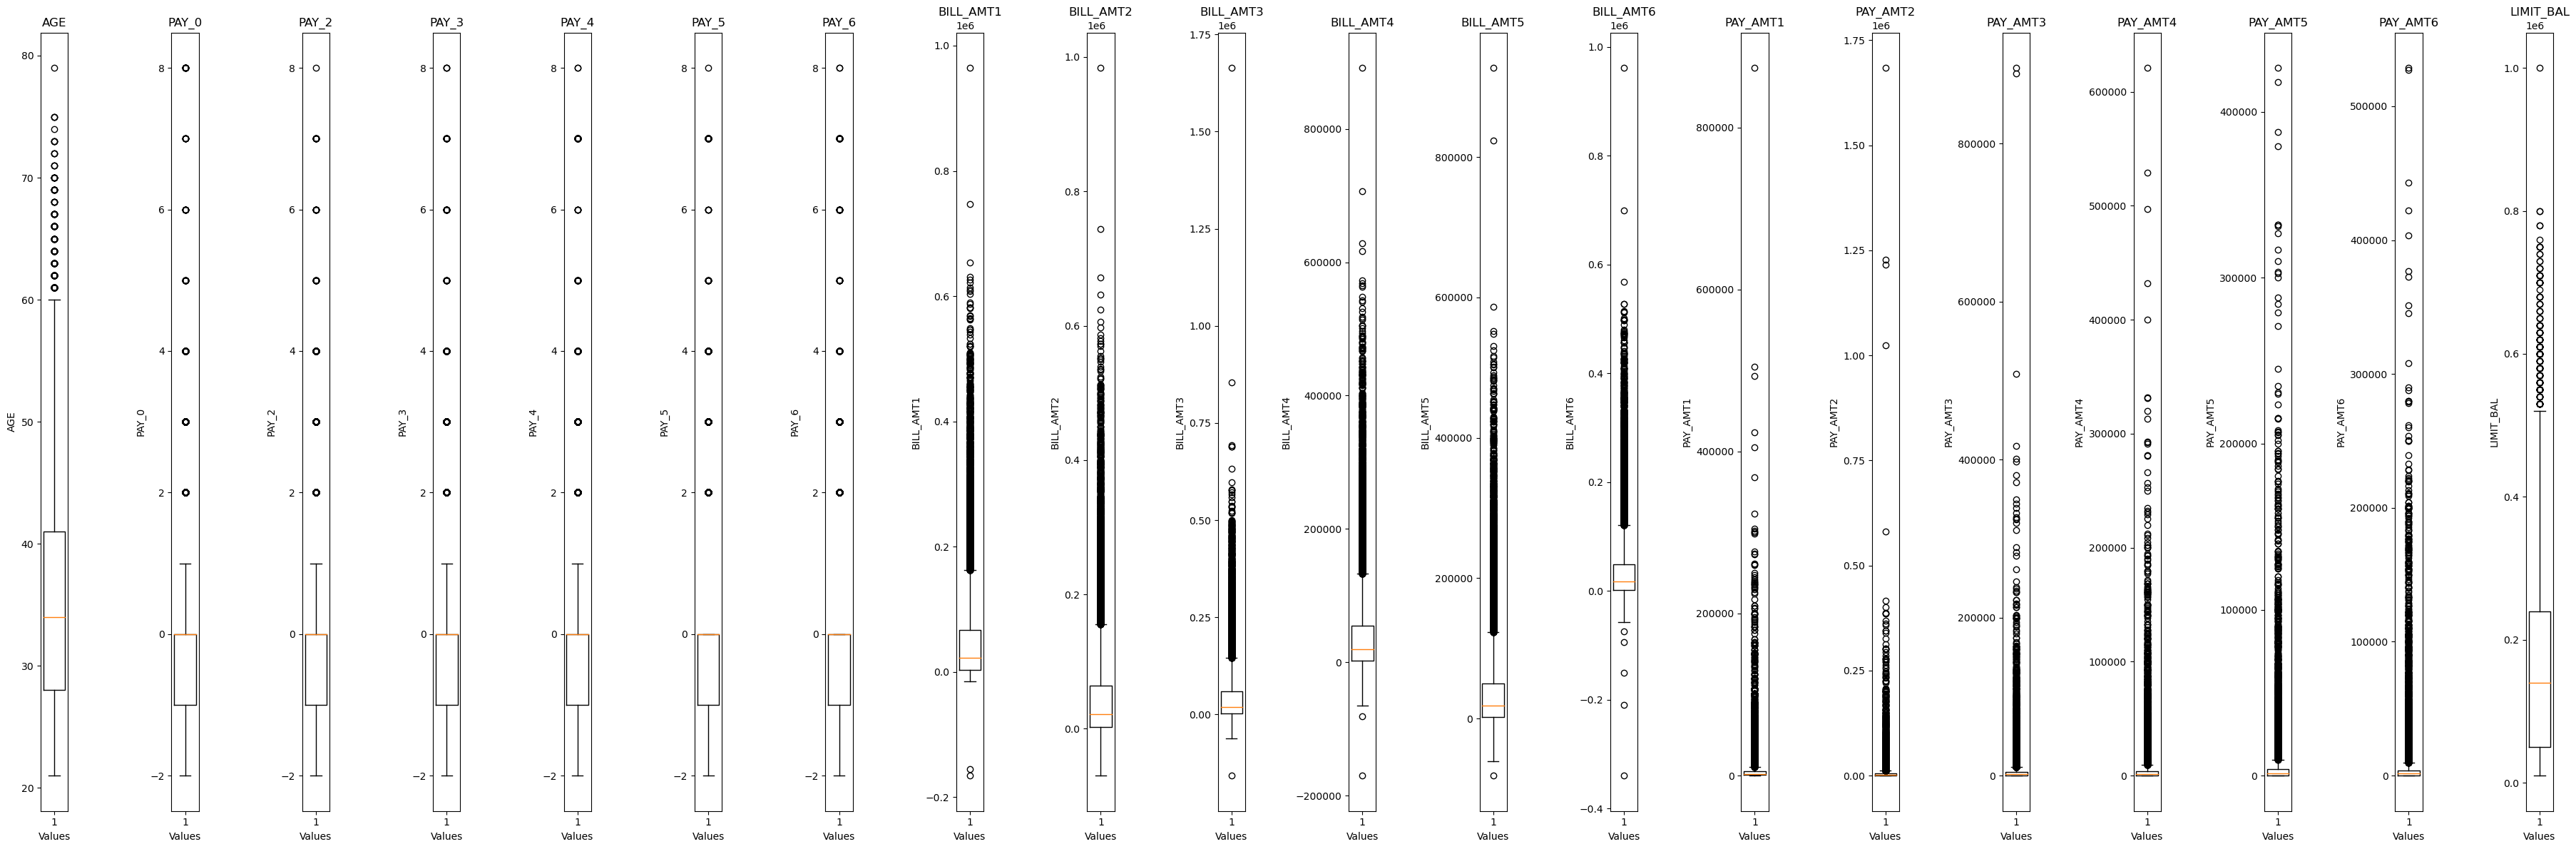

In [29]:
#BOX PLOT 
import matplotlib.pyplot as plt

# Set the figure size
fig, axes = plt.subplots(ncols=len(x_numericdata1.columns), figsize=(36, 12))

# Create individual vertical boxplots for each column with separation
for i, column in enumerate(x_numericdata1.columns):
    axes[i].boxplot(x_numericdata1[column], vert=True, widths=0.8)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()
# Adjust layout to add space between subplots
plt.subplots_adjust(wspace=3.8) 
plt.show()

#there are potential outliers are present in the data

In [ ]:
#NOTE:
The **Yeo-Johnson transformation** is a powerful statistical technique used to transform data in order to achieve several objectives:

1. **Stabilizing Variance**: By applying the Yeo-Johnson transformation, we can stabilize the variance of our data.
This is particularly useful when dealing with heteroscedasticity, where the variance of the dependent variable changes across different levels of the 
independent variable.

2. **Normalizing Distribution**: The transformation aims to make the data distribution more **normal-like**. 
It helps address situations where the data deviates significantly from a normal distribution, which is often an assumption in many statistical methods.

3. **Handling Negative Values**: Unlike the Box-Cox transformation, which only works with positive values,
the Yeo-Johnson transformation can handle both **positive and negative** values. This flexibility makes it suitable for a wider range of data types.

4. **Improving Measures of Association**: When calculating measures of association (such as the Pearson correlation coefficient),
transforming the data using Yeo-Johnson can lead to more valid results.

5. **Quantile Regression**: The Yeo-Johnson transformation can also be used in **quantile regression**, a method that focuses on estimating 
conditional quantiles of the response variable.




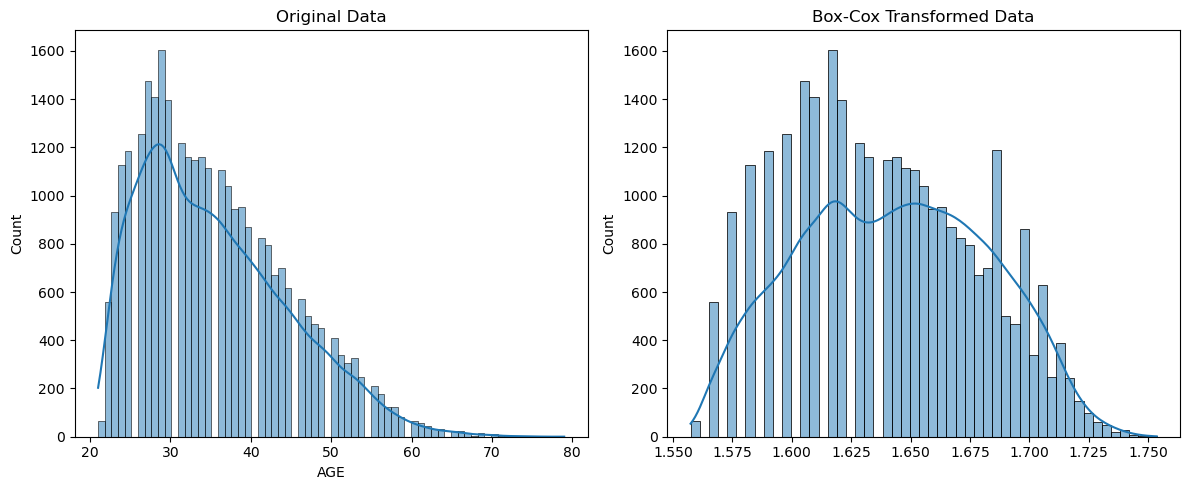

Optimal lambda value: -0.5089368981686776


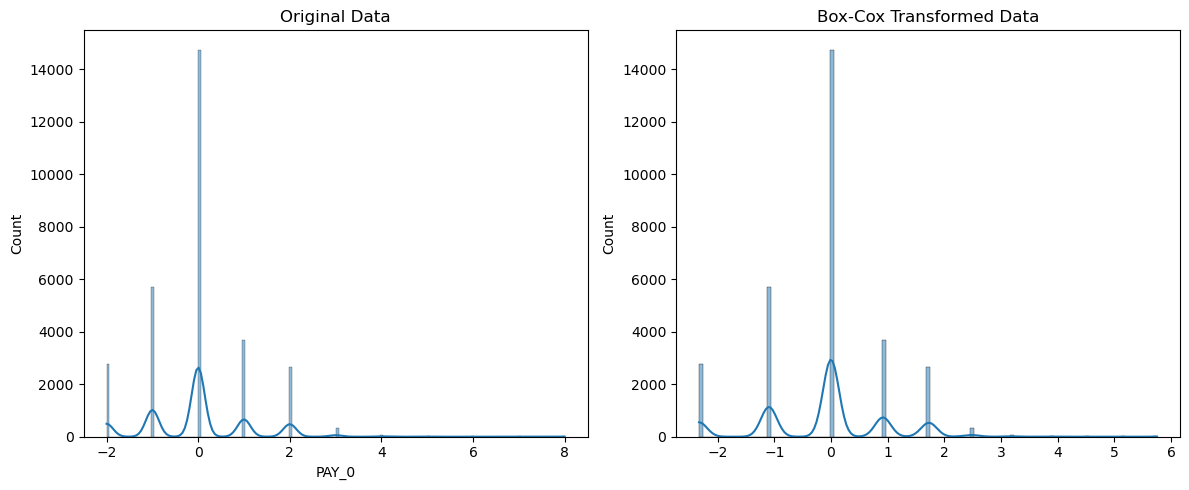

Optimal lambda value: 0.7699211837051743


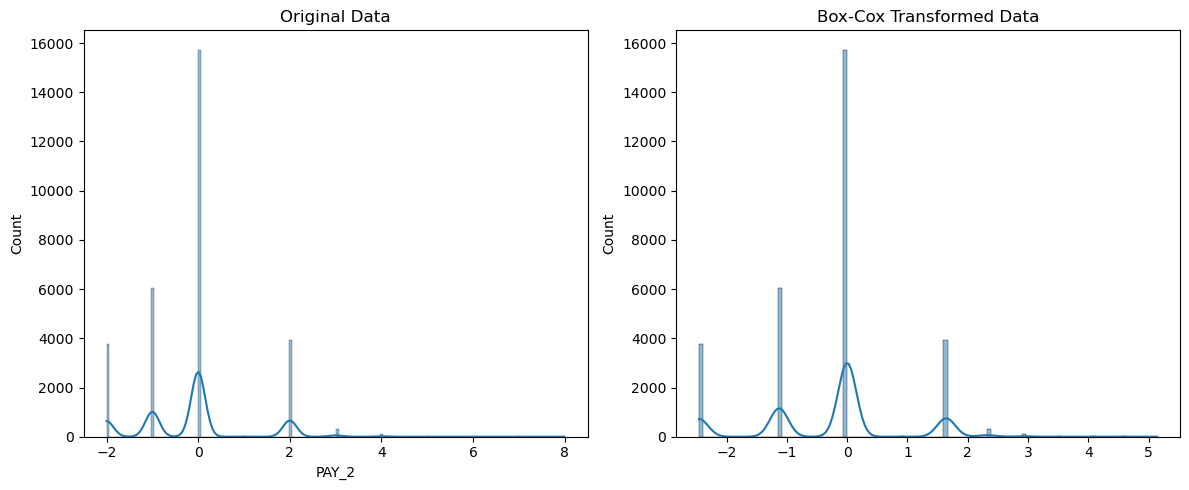

Optimal lambda value: 0.6885613368663808


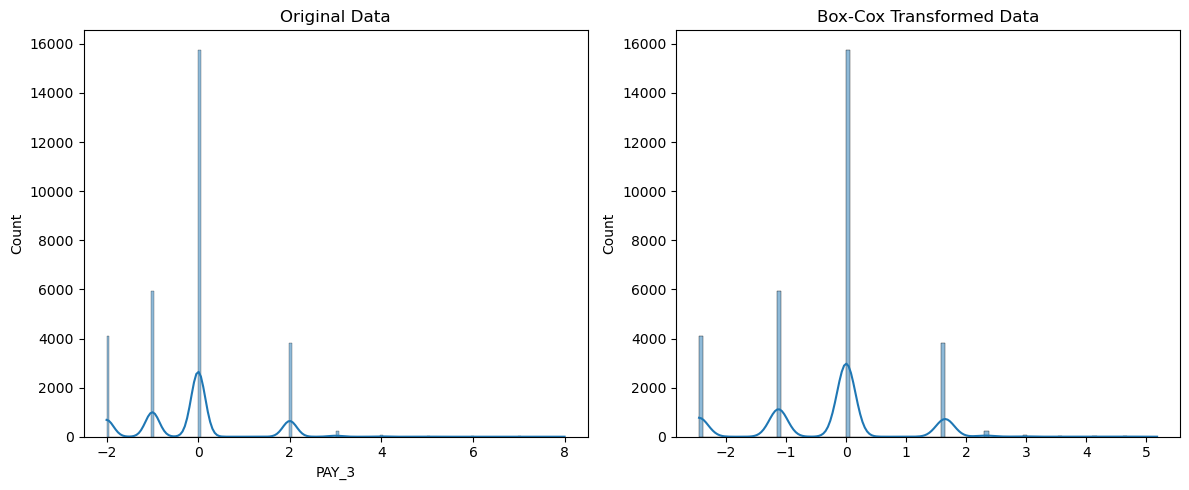

Optimal lambda value: 0.6936249371631138


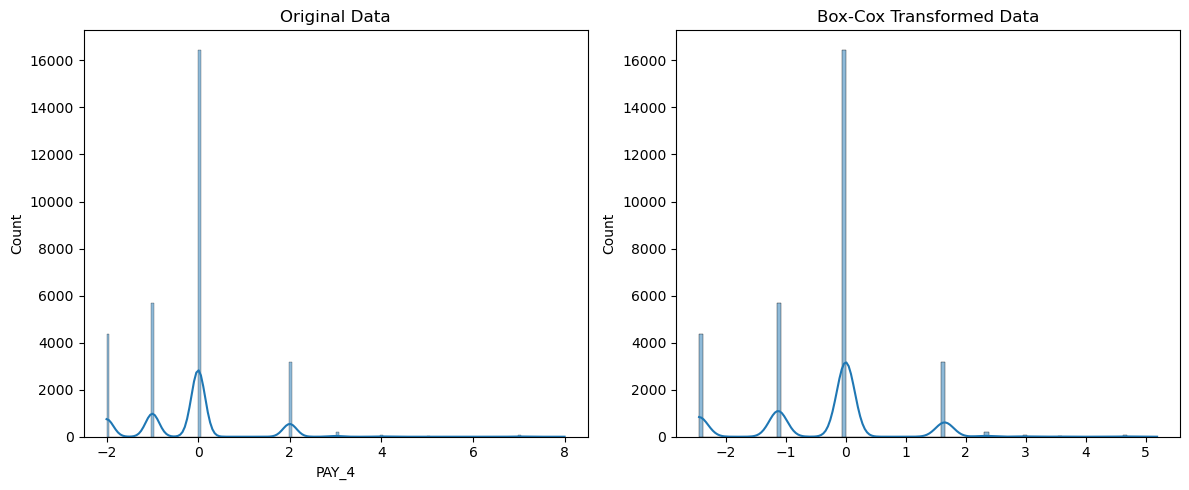

Optimal lambda value: 0.6958563913557946


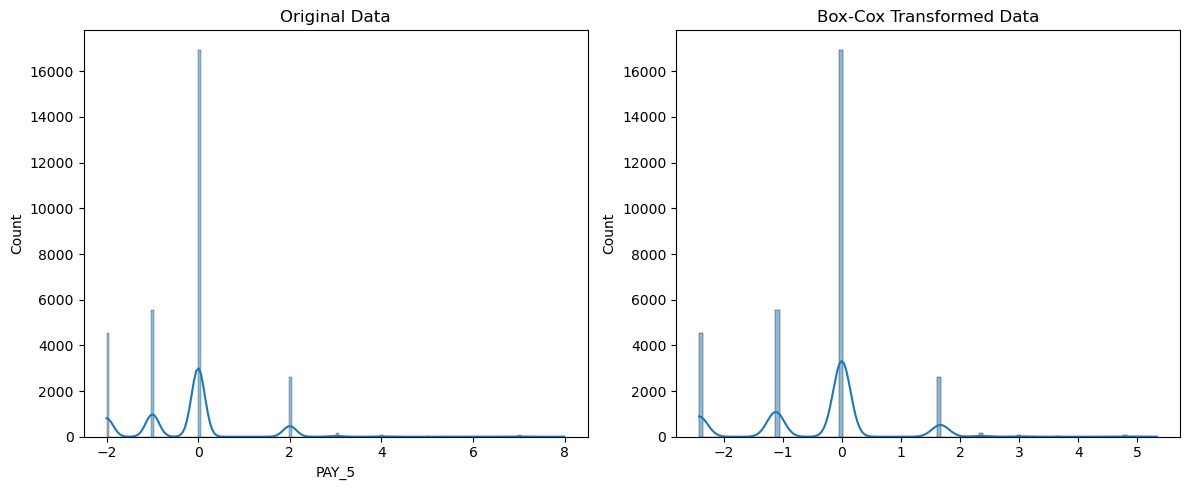

Optimal lambda value: 0.7152130751707448


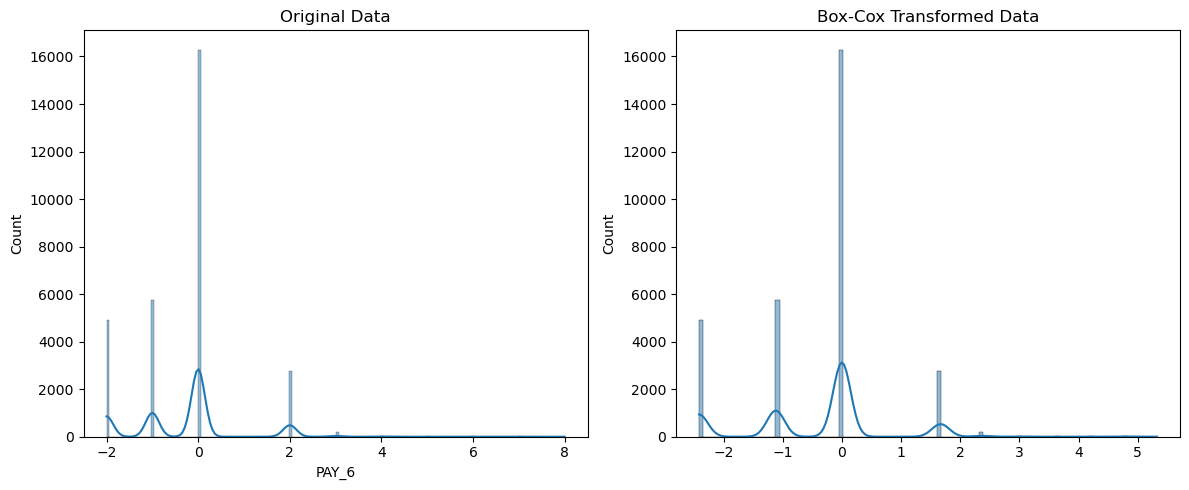

Optimal lambda value: 0.714631283110258


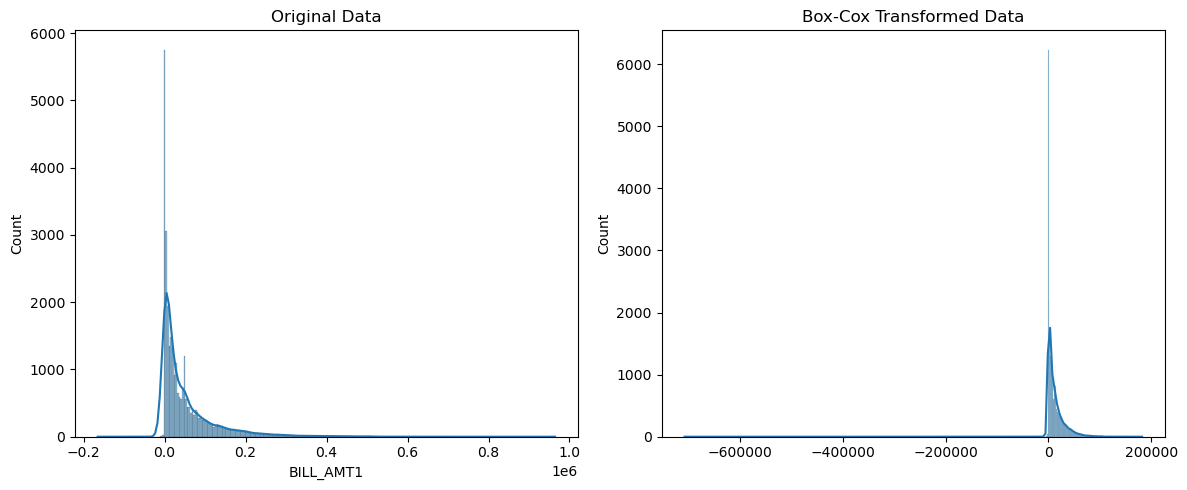

Optimal lambda value: 0.8688660653388132


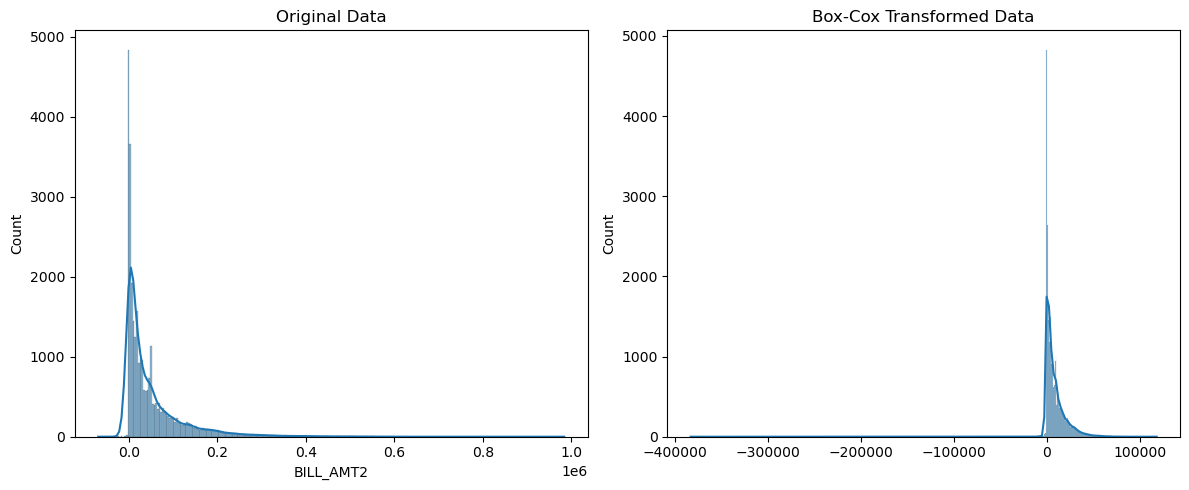

Optimal lambda value: 0.8333747402077599


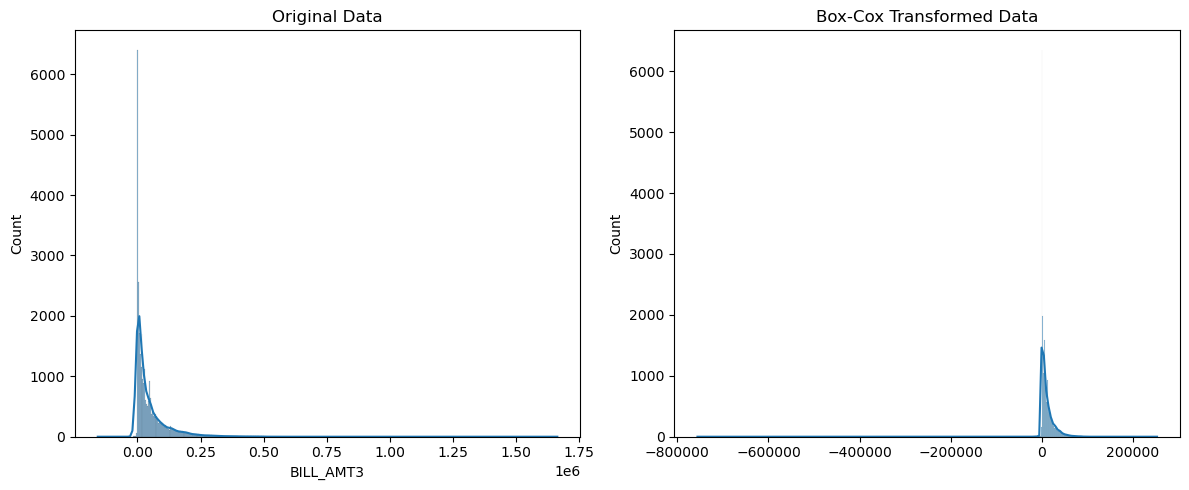

Optimal lambda value: 0.8576835776346465


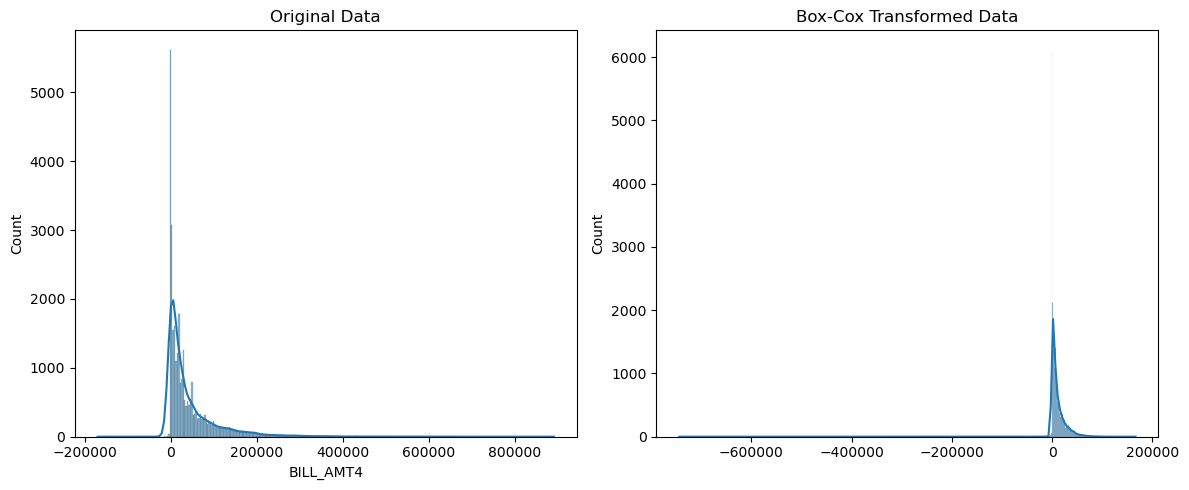

Optimal lambda value: 0.8670957264716354


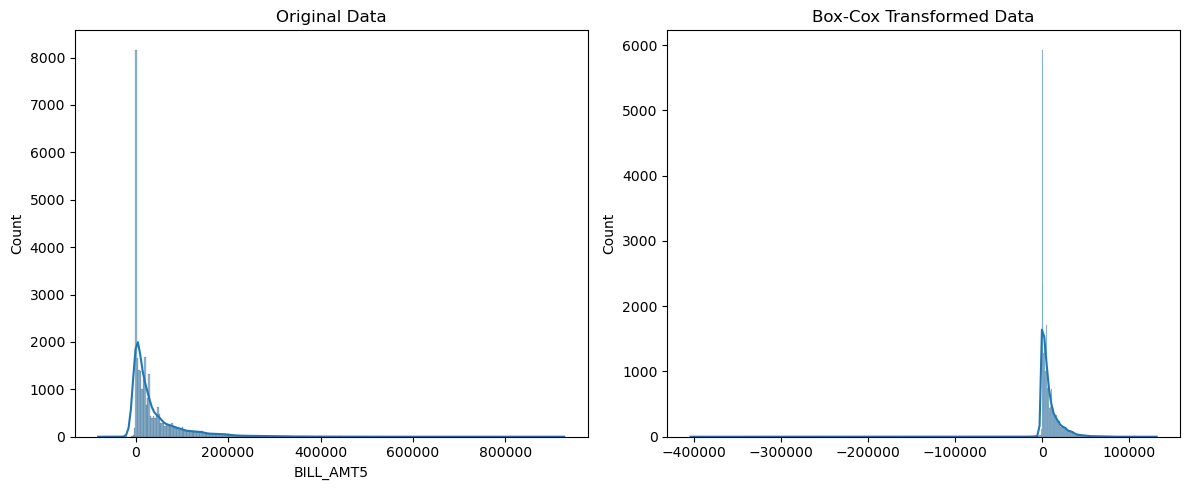

Optimal lambda value: 0.8456078569890108


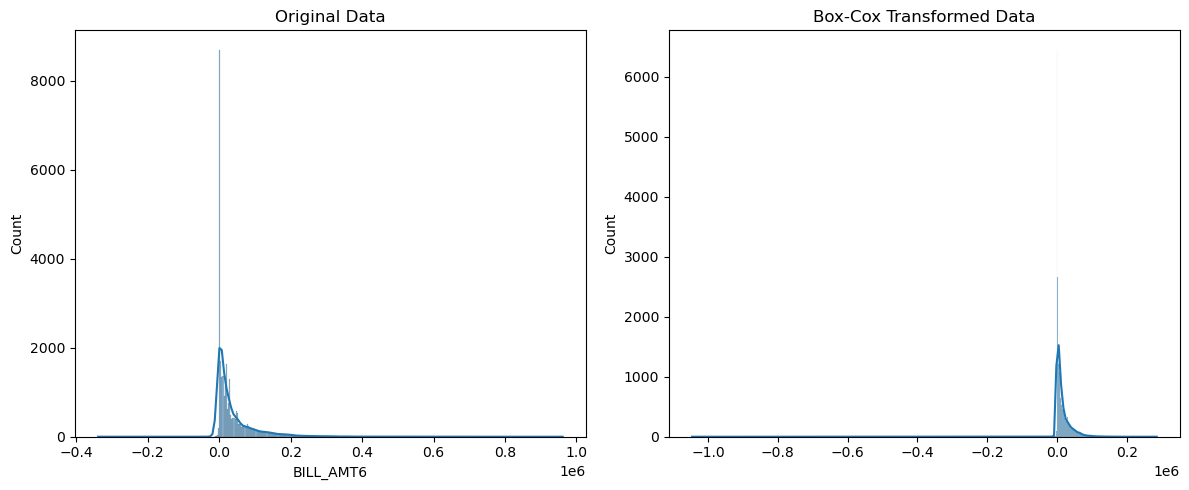

Optimal lambda value: 0.904543838183736


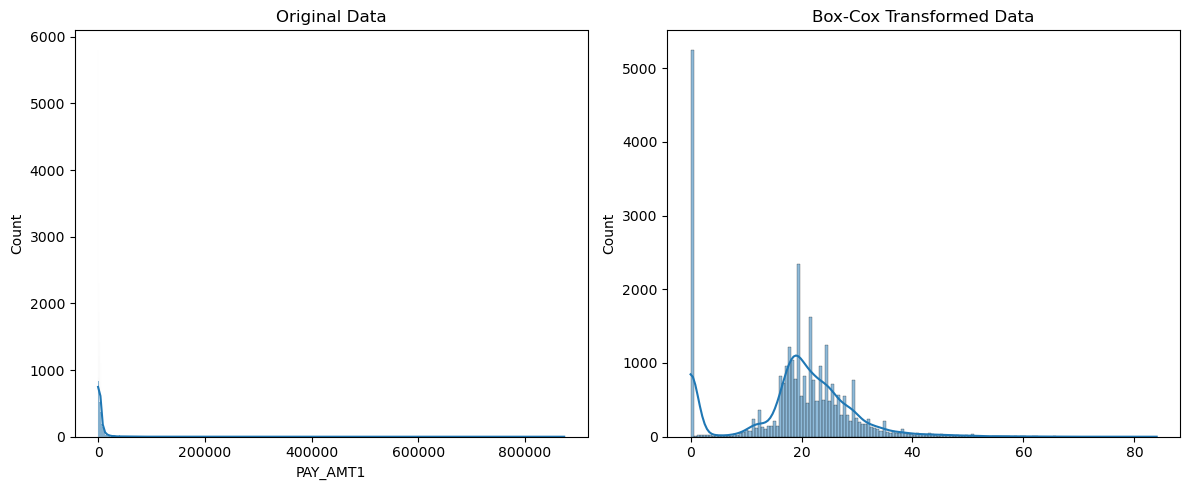

Optimal lambda value: 0.21570174606185946


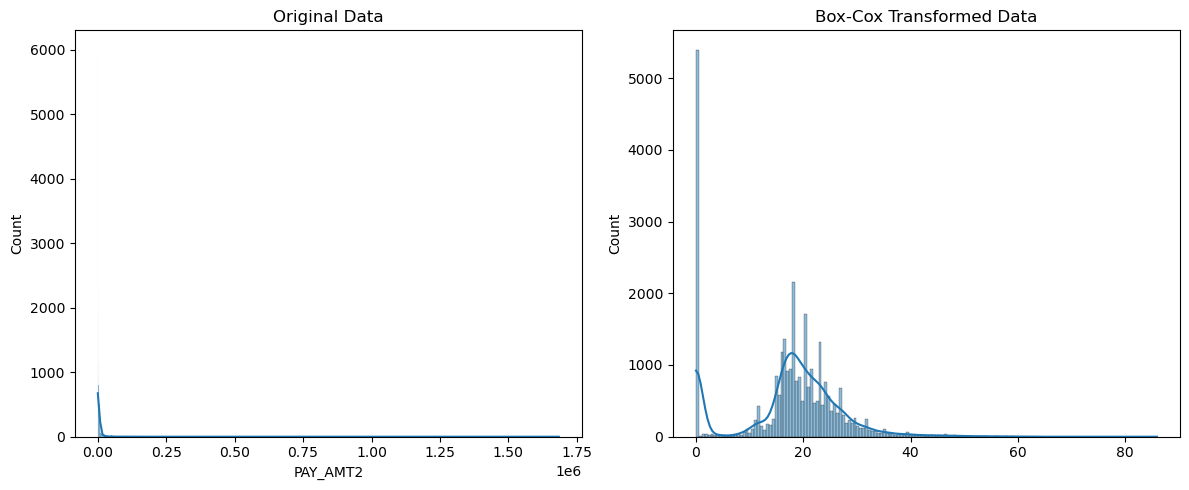

Optimal lambda value: 0.20344044626441457


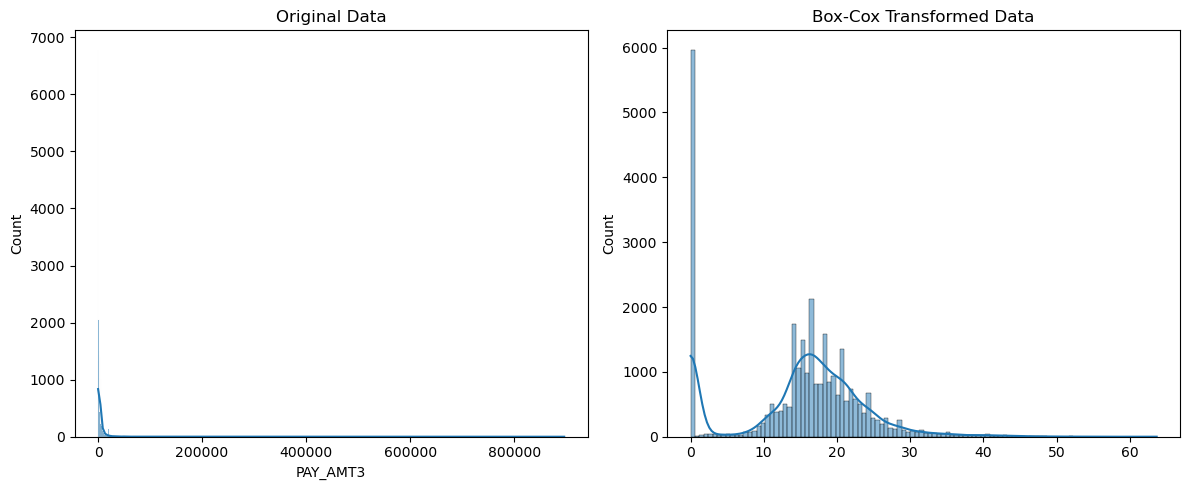

Optimal lambda value: 0.18641238089543744


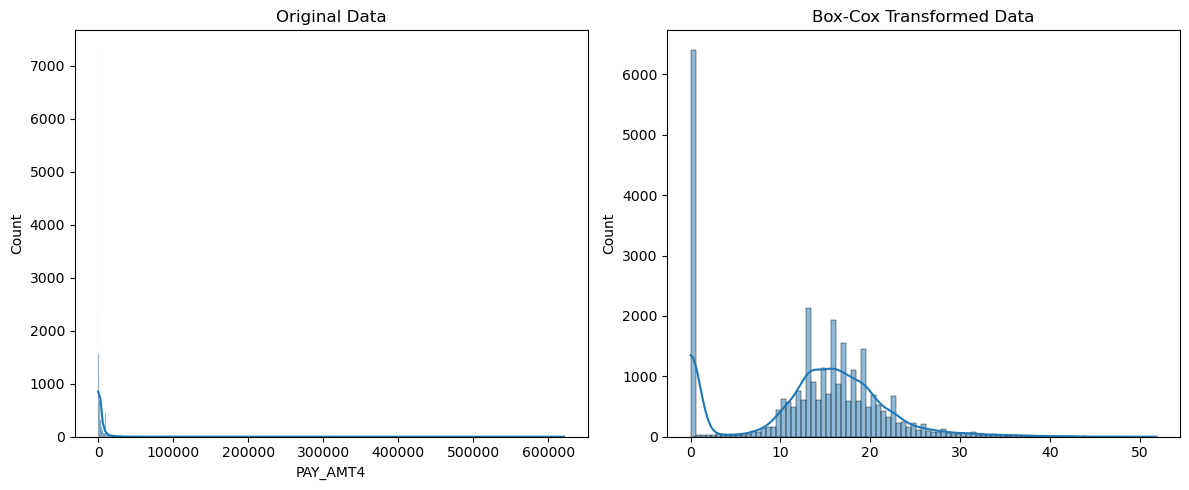

Optimal lambda value: 0.1721100252107511


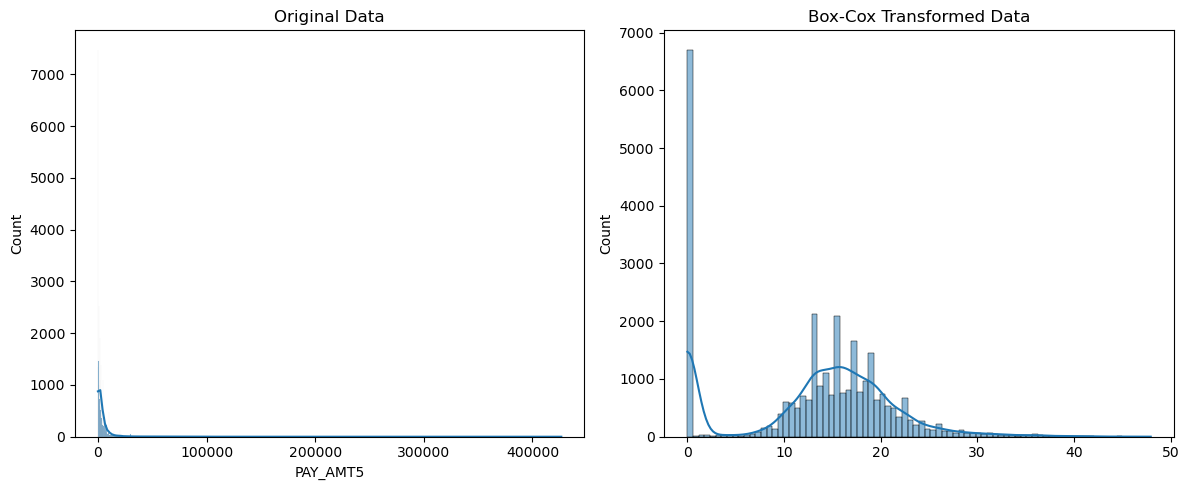

Optimal lambda value: 0.1713115923513936


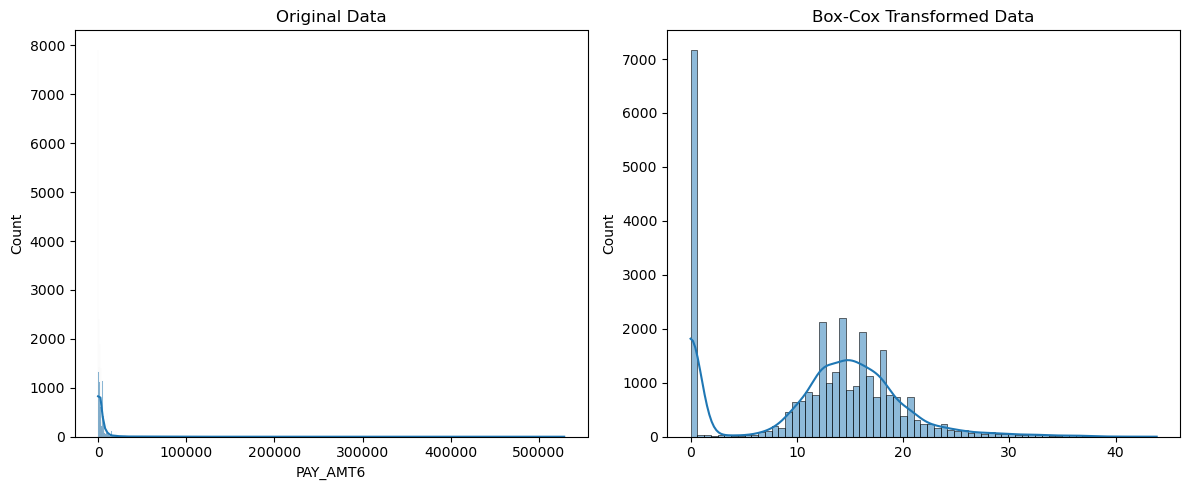

Optimal lambda value: 0.15652989200082737


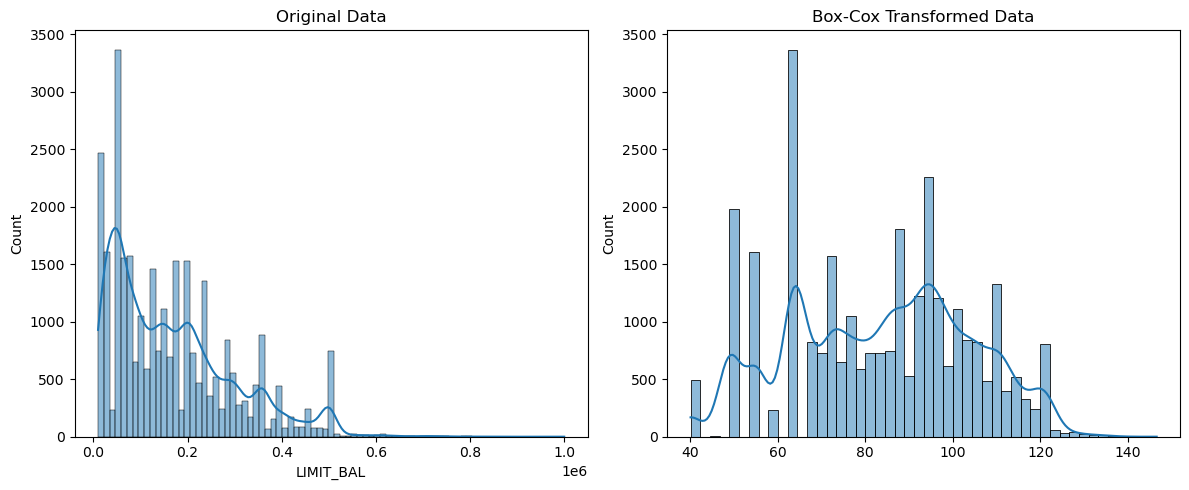

Optimal lambda value: 0.2673495136759914


In [32]:
#As there is presence of negative values in the dataset we use yeo johnson method for transformation 

#Yeo johnson tranformation 
from scipy.stats import yeojohnson 

transformed_final=pd.DataFrame()

for col in x_numericdata1.columns:
    transformed_data,lambda_value=yeojohnson(x_numericdata1[col])
    transformed_final[col] = transformed_data
    
    # Plot the original and transformed data side by side
    plt.figure(figsize=(12, 5))

    # Original data
    plt.subplot(1, 2, 1)
    sns.histplot(x_numericdata1[col], kde=True)
    plt.title('Original Data')

    # Transformed data
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data, kde=True)
    plt.title('Box-Cox Transformed Data')

    plt.tight_layout()
    plt.show()

    # Print the lambda value
    print("Optimal lambda value:", lambda_value)

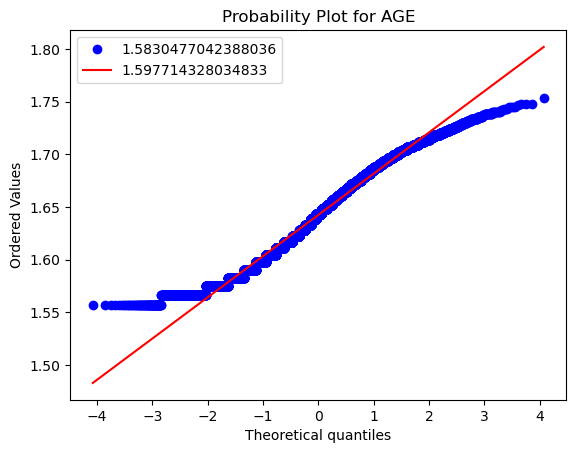

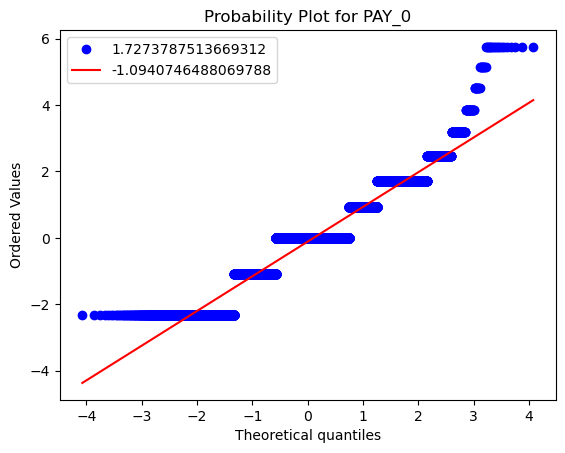

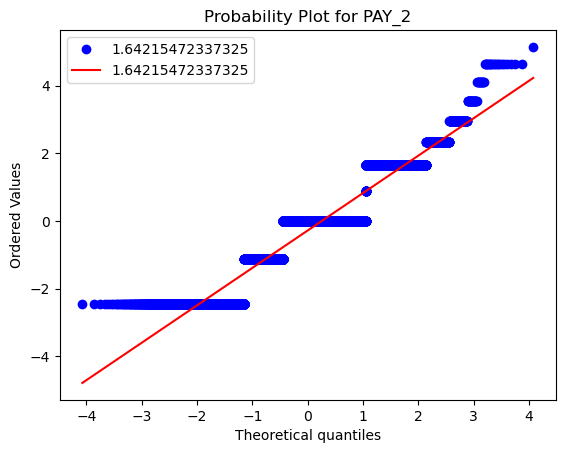

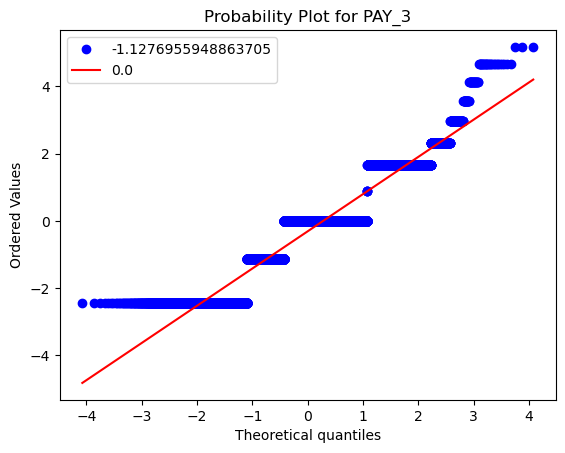

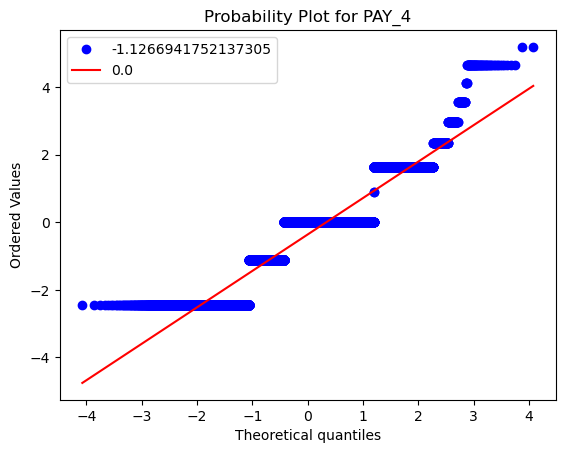

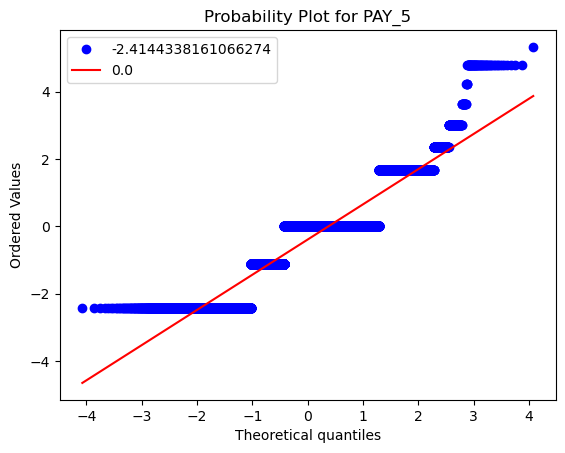

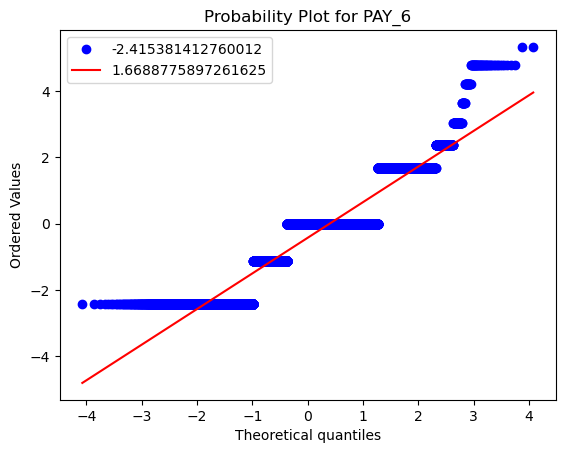

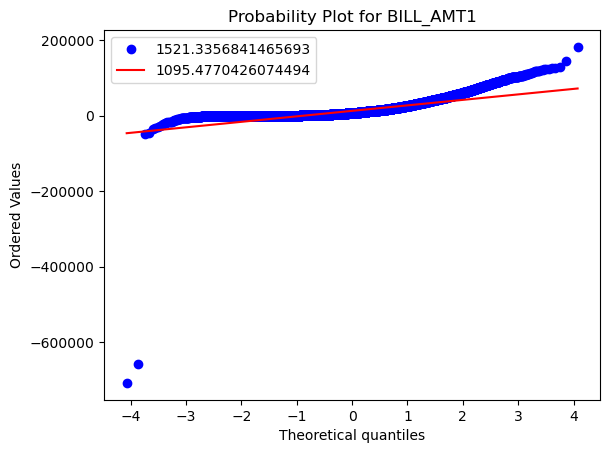

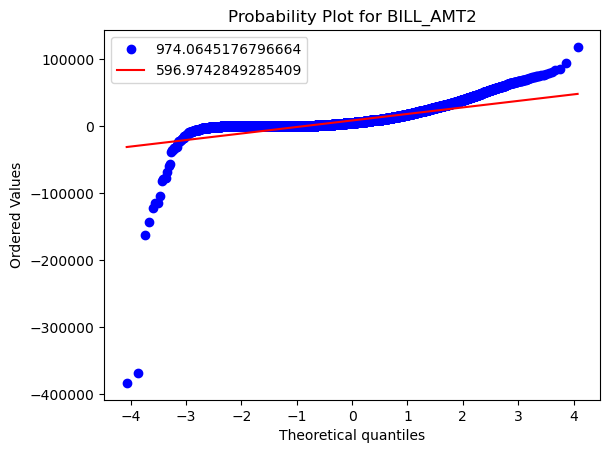

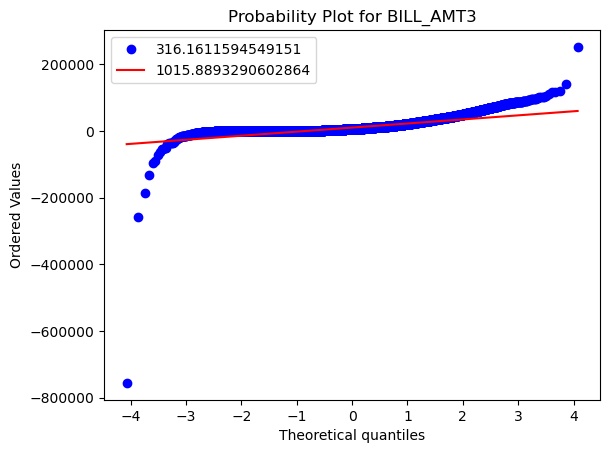

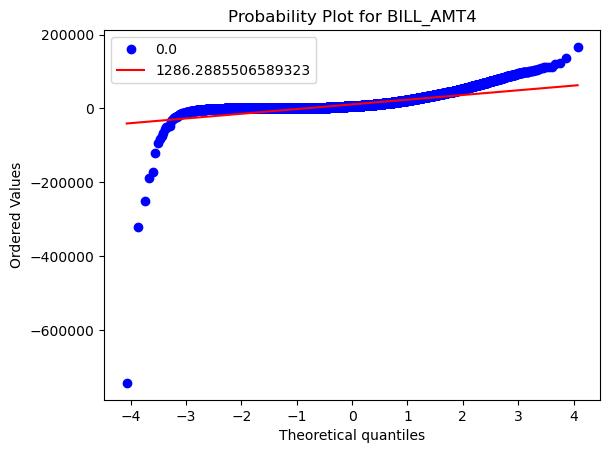

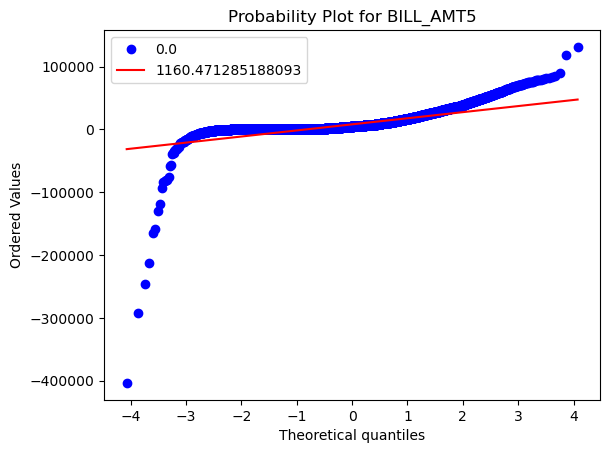

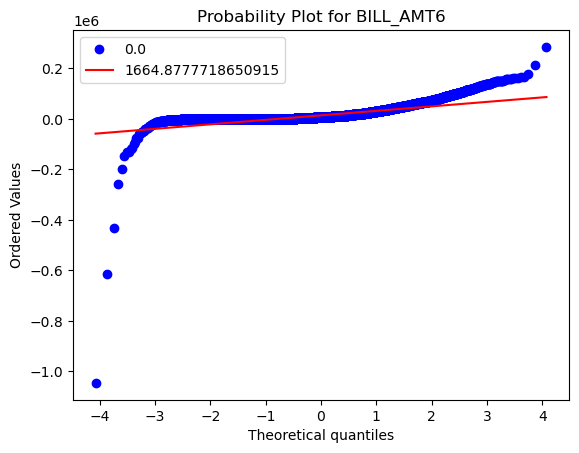

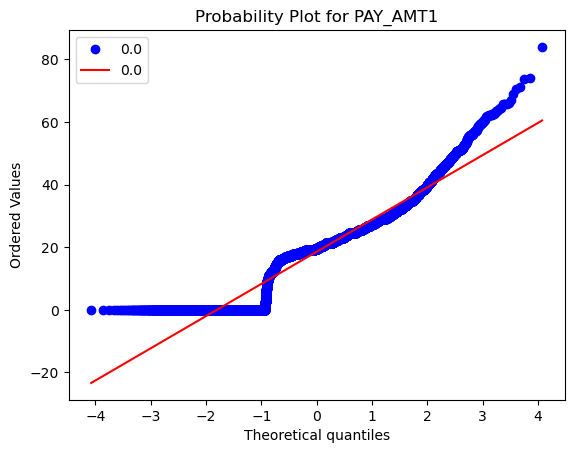

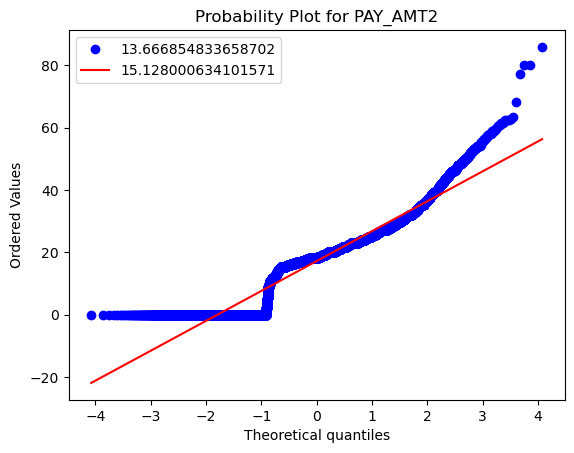

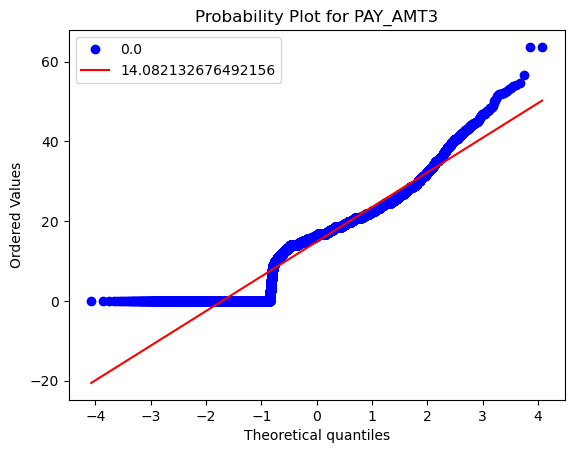

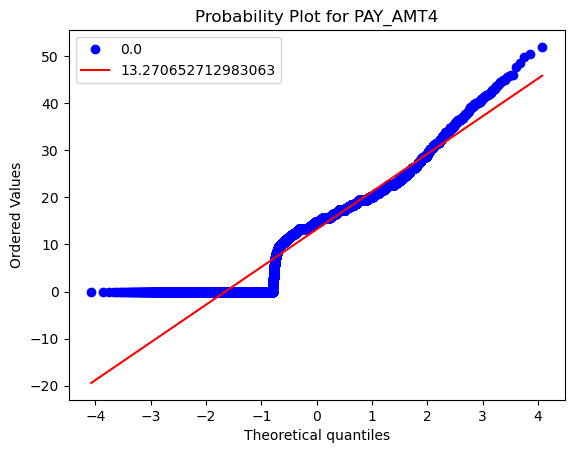

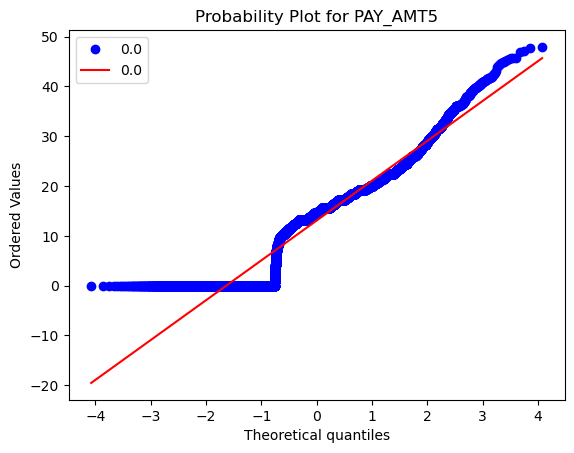

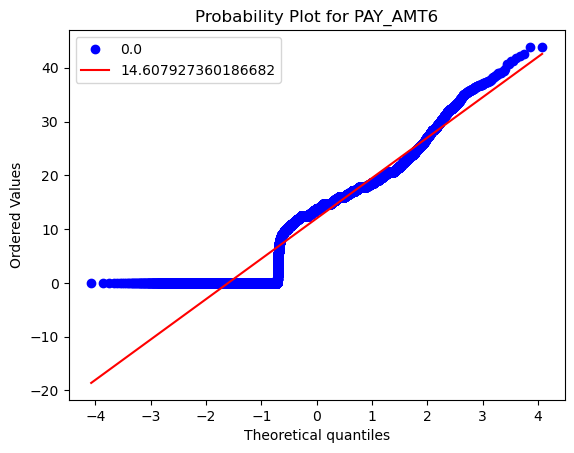

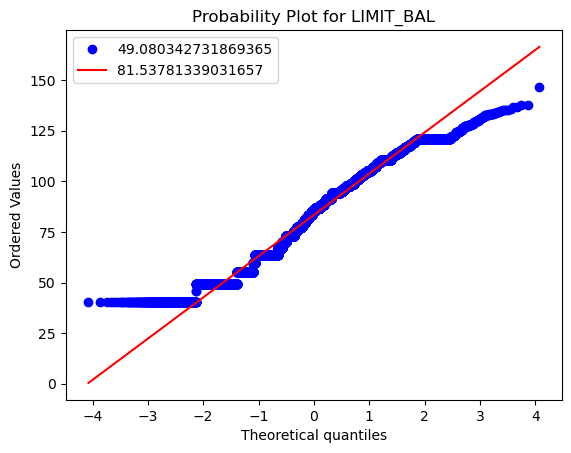

In [33]:
# qq plot on the transformed data 
for col in transformed_final.columns:
    stats.probplot(transformed_final[col],dist='norm',plot=pylab)
    plt.legend(labels=transformed_final[col])
    plt.title(f'Probability Plot for {col}')
    plt.show()
    
    
# histogram on the discrete values of  repayment status of the transformed data 
for col in transformed_final.iloc[:,1:7].columns:
    fig=px.histogram(transformed_final[col])
    plt.title(f'{col}')
    fig.show()

In [ ]:
import matplotlib.pyplot as plt
 
# Set the figure size
fig, axes = plt.subplots(ncols=len(transformed_final.columns), figsize=(36, 12))

# Create individual vertical boxplots for each column with separation
for i, column in enumerate(transformed_final.columns):
    axes[i].boxplot(transformed_final[column], vert=True, widths=0.8)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()
# Adjust layout to add space between subplots
plt.subplots_adjust(wspace=3.8) 
plt.show()


#ON discrete pay scale columns

for col in (transformed_final.columns):
    fig=px.box(transformed_final[col])
    fig.show()
    
    
    
# Set the figure size
fig, axes = plt.subplots(ncols=len(transformed_final.columns), figsize=(36, 12))

# Create individual vertical boxplots for each column with separation
for i, column in enumerate(transformed_final.columns):
    axes[i].boxplot(transformed_final[column], vert=True, widths=0.8)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()
# Adjust layout to add space between subplots
plt.subplots_adjust(wspace=3.8) 
plt.show()
    

In [ ]:
transformed_final.info()
  

In [38]:
# SCALE THE DATA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


In [ ]:
# concatinate the categ and num variables data 
model_scaling_data=pd.concat([x_categ_Final,transformed_final],axis=1)
model_scaling_data 

In [ ]:
 #SPLIT THE DATA AS OUTPUT AND INPUT VARIABLES
y.value_counts() # the dataset is an imbalanced dataset so use stratified spliting to split train and testing data on equal proportion of stratify variable like in our case output variable.

x_train,x_test,y_train,y_test=train_test_split(model_scaling_data,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
1. Dealing with Imbalanced Data:

If your dataset has imbalanced classes, consider techniques like oversampling, undersampling, or using specialized algorithms to handle the imbalance.


Identification: Check if your dataset exhibits a significant imbalance in the distribution of target classes. 
This is common in classification problems where one class has much fewer instances than the others.
Techniques:
Oversampling: Increase the number of instances in the minority class by duplicating or creating synthetic samples.
Undersampling: Reduce the number of instances in the majority class by randomly removing samples.
SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class to balance the distribution.

2. Feature Engineering:

Create new features that may enhance the model's performance.
Transform variables or derive meaningful features from existing ones.
Handling Time Series Data:

If working with time series data, ensure proper handling of timestamps, and consider lag features or rolling statistics to capture temporal patterns.



Creation of New Features:
Derive new features that might provide additional information to the model. For example, combining "date" and "time" features to create a "timestamp" feature.
Polynomial features: Introduce higher-order terms of existing features.
Transformation of Features:
Apply mathematical transformations to features. For example, taking the logarithm of a skewed variable.
Handling Time Series Data:

Timestamps and Time Features:
Extract relevant information from timestamps, such as hour of the day, day of the week, etc.

Lag Features:
Create lag features by shifting values in time. For example, use the value of a variable from the previous time step as a feature.
Rolling Statistics:
Compute rolling averages or other statistical measures over a window of time to capture trends and patterns.


3. Handling Multicollinearity:

Check for multicollinearity among features and consider removing or combining correlated features.


Data Scaling for Model Performance:

Depending on the chosen model, certain algorithms might require data to be scaled differently (e.g., decision trees vs. neural networks).

Normalization:
Scale numerical features to a standard range (e.g., [0, 1]). Useful for algorithms sensitive to the scale of input features, 
such as k-nearest neighbors or support vector machines.
Methods include Min-Max scaling.
Standardization:
Transform features to have a mean of 0 and a standard deviation of 1. Useful for algorithms that assume normally distributed data, such as linear regression.
Methods include Z-score normalization.
These preprocessing steps aim to enhance the quality of the data and improve the performance of machine learning models. 
The choice of techniques depends on the characteristics of the data and the requirements of the specific modeling task. 
Experimenting with different approaches and evaluating their impact on model performance is crucial for finding the most effective preprocessing strategy.





